#Predicao da producao industrial brasileira sem colunas nan

Artigos:http://old.scielo.br/scielo.php?script=sci_arttext&pid=S1413-80502008000200001

https://bibliotecadigital.fgv.br/dspace/bitstream/handle/10438/29319/Marcolino_Ferreira_2019.pdf?sequence=1&isAllowed=y



In [115]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima
##Solucao https://blog.csdn.net/qq_49821869/article/details/128540436
import os
os.kill(os.getpid(),9)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importar bibbliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from pmdarima import arima
import plotly.express as ploty
from datetime import datetime
from datetime import timedelta

In [2]:
##Biblioteca para permitir que o colab acesse o google drive 
#https://www.youtube.com/watch?v=yl2WiFbZhPs
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Funcoes_criadas')

In [3]:
## testes de aderencia e estacionaridades
#https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [4]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [5]:
##Salvar as dependencias deste projeto
#!pip freeze > requirements.txt

In [6]:
##Importando
#!pip install -r requirements.txt

#Importando os dados

In [7]:
data_inicio = '2003-01-01'
date_inicio = datetime.strptime(data_inicio, '%Y-%m-%d')
year = date.year


##Dados trafego de veiculos pesados(Indice ABCR)

Site:https://melhoresrodovias.org.br/indice-abcr/

O passar dos anos mostrou a grande relevância do Índice ABCR na análise conjuntural da economia brasileira, dado que é um indicador de alta frequência e que se correlaciona com indicadores econômicos relevantes, como o PIB, a produção na indústria, as vendas no comércio varejista, os salários, entre outros.

O Índice ABCR considera apenas o fluxo das rodovias sob concessão privada. A ABCR e a Tendências Consultoria Integrada não calculam números-índices para cada concessionária. O cálculo é feito com base no fluxo de cada concessionária, mas o número-índice é calculado apenas para o país, índice agregado Brasil, estados de São Paulo e Rio de Janeiro. O Índice ABCR é dessazonalizado com base no método X-12 ARIMA. Trata-se de combinação de uma regressão linear da função média com a regressão para os termos de erro, que são modelados segundo um modelo ARIMA. O processo de modelagem ARIMA faz uma projeção da série analisada para trás e para frente, escolhendo a especificação que resulta na melhor aderência; o resultado é uma maior confiabilidade para os resultados mais recentes e uma maior suavização da série ao longo da amostra. O X-12 permite outros avanços, como:
a inclusão do efeito de dias úteis;
efeitos do tipo ano bissexto;
detecção automática de outliers;
mudanças de nível ao longo das séries;
escolha automática da forma de decomposição da série.
No procedimento, foram considerados, ainda, efeitos específicos para o calendário brasileiro. Quando ocorre a entrada de novas praças, para evitar distorções nas variações, as informações são computadas, porém não entram no cálculo do indicador até que ocorra uma nova revisão da base, quando houver dados disponíveis para dois anos ou mais, possibilitando observar um padrão sazonal. Quando há mudança de cobrança (unidirecional ou bidirecional) são utilizados ajustes para corrigir as distorções geradas. O padrão utilizado é a cobrança bidirecional.

In [8]:
def funcao_pegar_trafego_veiculos():
  """
  A função funcao_pegar_trafego_veiculos() é usada para realizar web scraping no site https://melhoresrodovias.org.br/indice-abcr/. 
  Ela importa as bibliotecas requests e BeautifulSoup e define a url do site alvo. Em seguida, faz uma requisição para a página e cria um 
  objeto soup para fazer a busca dos links.
  A função então procura por links com href igual a 'https://melhoresrodovias.org.br/wp-content/uploads/2023/01/abcr_0123.xls' e armazena em uma variável href. 
  Em seguida, usa a biblioteca pd.read_excel para ler o arquivo xls e selecionar as colunas 'Unnamed: 0','LEVES','PESADOS','TOTAL', 
  renomeando as colunas e definindo o indice como data. Por fim, retorna o dataframe com os dados de tráfego de veículos.
  """
  import requests
  from bs4 import BeautifulSoup

  url = 'https://melhoresrodovias.org.br/indice-abcr/'
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  for link in soup.find_all('a'):
    if link.get('href') == 'https://melhoresrodovias.org.br/wp-content/uploads/2023/01/abcr_0123.xls':
        href = link.get('href')
  trafego =pd.read_excel(href,sheet_name='(C) Original',header=2)[['Unnamed: 0','LEVES','PESADOS','TOTAL']]
  trafego.head()
  trafego.columns = ['data','leves','pesado','total']
  trafego.index = pd.to_datetime(trafego['data'])
  trafego.drop('data',axis=1,inplace=True)
  return trafego

In [9]:
trafego_pesado = funcao_pegar_trafego_veiculos()

In [10]:
trafego_pesado.head()

leves      pesado       total
data                                          
1999-01-01  117.667781   94.286208  112.442880
1999-02-01   98.318947   87.925361   95.996372
1999-03-01   95.978647  107.940122   98.651586
1999-04-01   97.189397   98.208155   97.417051
1999-05-01   96.210717  101.902630   97.482645

##Dados IPEADATA





###Produção industrial 
(codigo:'PAN12_QIIGG12')
Frequência: Mensal Fonte: Instituto Brasileiro de Geografia e Estatística, Pesquisa Industrial Mensal - Produção Física (IBGE/PIM-PF) Unidade: (% a.a.).
Comentário: Produção da indústria geral (quantum). Variação percentual em relação ao mesmo período do ano anterior.

In [11]:
!pip install ipeadatapy
import ipeadatapy as ip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#Lista das series
codigos = ip.list_series()

In [13]:
codigos[codigos.CODE == 'PAN12_QIIGG12']

CODE                 NAME
7429  PAN12_QIIGG12  Produção industrial

In [14]:
producao_ind = ip.timeseries('PAN12_QIIGG12')

In [15]:
producao_ind.head()

YEAR  DAY  MONTH           CODE                   RAW DATE  \
DATE                                                                     
1969-12-01  1969    1     12  PAN12_QIIGG12  1969-12-01T00:00:00-02:00   
2003-01-01  2003    1      1  PAN12_QIIGG12  2003-01-01T00:00:00-02:00   
2003-02-01  2003    1      2  PAN12_QIIGG12  2003-02-01T00:00:00-02:00   
2003-03-01  2003    1      3  PAN12_QIIGG12  2003-03-01T00:00:00-03:00   
2003-04-01  2003    1      4  PAN12_QIIGG12  2003-04-01T00:00:00-03:00   

            VALUE ((% a.a.))  
DATE                          
1969-12-01         -2.663707  
2003-01-01          2.193232  
2003-02-01          2.965599  
2003-03-01          0.018282  
2003-04-01         -3.858137

### Produção industrial - bens intermediários - quantum 
Codigo:PIMPFN12_QIBIN12

Produção industrial - bens intermediários - quantum - índice (média 2012 = 100)

Frequência: Mensal Fonte: Instituto Brasileiro de Geografia e Estatística, Pesquisa Industrial Mensal - Produção Física (IBGE/PIM-PF) Unidade: - Atualizado em: 5/1/2023
Comentário: A produção industrial de bens intermediários, compreende-se sua utilização como insumo para a produção de outros bens e incluem, entre outros itens, partes e peças para veículos, componentes eletro-eletrônicos, minérios e produtos siderúrgicos básicos, elementos e compostos químicos e soja em grão. Base é o valor, num determinado momento ( efetivo ou resultante da média tomada dentro de um intervalo de tempo) que serve de termo de comparação, quando se quer calcular uma sucessão de números-índices. Aqui a base foi fixada como a média das observações no ano de 2012. Notas: A Pesquisa Industrial Mensal Produção Física têm por objetivo acompanhar a evolução do produto real da indústria no curto prazo, sendo necessário o levantamento de informações de volume físico de produtos selecionados e representativos de diferentes atividades industriais, como das indústrias extrativas e de transformação. A pesquisa vêm sendo feita desde 1970, com informações fornecidas todos os meses, até o dia 10 de cada mês posterior ao de referência. A partir de maio de 2014, a Pesquisa Industrial Mensal Produção Física, sofre reformulação e dá-se início a divulgação da nova série de índices mensais da produção industrial, com base nas novas classificações, de atividades e produtos, usadas pelas demais pesquisas da indústria a partir de 2007, quais sejam: a Classificação Nacional de Atividades Econômicas - CNAE 2.0 e a Lista de Produtos da Indústria - PRODLIST-Indústria. Segundo a classificação da CNAE 2.0, a Produção Industrial só identifica os serviços industriais mais importantes e somente quando são exercidos sob contrato. A montagem das partes componentes de produtos industriais, tanto de componentes de produção própria como de terceiros, é considerada uma atividade industrial

In [17]:
producao_ind_int = ip.timeseries('PIMPFN12_QIBIN12')
producao_ind_int.head()

YEAR  DAY  MONTH              CODE                   RAW DATE  \
DATE                                                                        
2002-01-01  2002    1      1  PIMPFN12_QIBIN12  2002-01-01T00:00:00-02:00   
2002-02-01  2002    1      2  PIMPFN12_QIBIN12  2002-02-01T00:00:00-02:00   
2002-03-01  2002    1      3  PIMPFN12_QIBIN12  2002-03-01T00:00:00-03:00   
2002-04-01  2002    1      4  PIMPFN12_QIBIN12  2002-04-01T00:00:00-03:00   
2002-05-01  2002    1      5  PIMPFN12_QIBIN12  2002-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
2002-01-01   77.21867  
2002-02-01   74.81031  
2002-03-01   83.33582  
2002-04-01   84.26701  
2002-05-01   87.01018

###Indicadores Industriais - utilização da capacidade instalada
Codigo: CNI12_NUCAP12

Indicadores Industriais - utilização da capacidade instalada - indústria - índice (média 2006 = 100)

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: (%) Atualizado em: 18/1/2023
Comentário: A pesquisa Indicadores Industriais tem o objetivo de mapear a evolução mensal da atividade industrial brasileira. A pesquisa Indicadores Industriais abrange 12 estados que respondem por 93,9% do PIB industrial do Brasil e por mais de 90% do total das variáveis investigadas.

In [18]:
capacidade_instalada = ip.timeseries('CNI12_NUCAP12')
capacidade_instalada.head()

YEAR  DAY  MONTH           CODE                   RAW DATE  \
DATE                                                                     
1991-12-01  1991    1     12  CNI12_NUCAP12  1991-12-01T00:00:00-02:00   
1992-01-01  1992    1      1  CNI12_NUCAP12  1992-01-01T00:00:00-02:00   
1992-02-01  1992    1      2  CNI12_NUCAP12  1992-02-01T00:00:00-02:00   
1992-03-01  1992    1      3  CNI12_NUCAP12  1992-03-01T00:00:00-03:00   
1992-04-01  1992    1      4  CNI12_NUCAP12  1992-04-01T00:00:00-03:00   

            VALUE ((%))  
DATE                     
1991-12-01      68.5850  
1992-01-01      69.4735  
1992-02-01      70.4062  
1992-03-01      70.6898  
1992-04-01      71.2810

###Papelão ondulado
Papelão ondulado - expedição de caixas, acessórios e chapas - quantidade

Codigo: ABPO12_PAPEL12

Frequência: Mensal Fonte: Associação Brasileira do Papelão Ondulado, Boletim Informativo (ABPO/Boletim) Unidade: Tonelada Atualizado em: 16/1/2023
Comentário: O papelão ondulado é um material 100% produzido a partir de fontes de matérias-primas renováveis, o que lhe confere alta competitividade e a excelente relação custo x benefício. Por sua grande sustentabilidade, o papelão ondulado é o material mais utilizado para a fabricação de embalagens, sendo responsável pelo transporte e proteção de aproximadamente 75% dos produtos embalados no mundo todo. O papelão ondulado é fabricado em uma máquina denominada onduladeira, onde as ondas são fabricadas de acordo com o perfil do cilindro ondulador. Os dados aqui registrados são alimentados pelas empresas fabricantes de papelão, as quais são associadas da Associação Brasileira de Papelão Ondulado (ABPO). Nota: Dados a partir de jan/2005 revisados pela fonte em 2011. Os dados anteriores aqui apresentados foram encadeados à série nova de modo a manter as variações mensais da série anteriormente disponível. Para isso, os valores de jan/1980 a dez/2004 da série antiga foram elevados em 24,95%. 

In [19]:
caixas = ip.timeseries('ABPO12_PAPEL12')
caixas.head()

YEAR  DAY  MONTH            CODE                   RAW DATE  \
DATE                                                                      
1980-01-01  1980    1      1  ABPO12_PAPEL12  1980-01-01T00:00:00-02:00   
1980-02-01  1980    1      2  ABPO12_PAPEL12  1980-02-01T00:00:00-02:00   
1980-03-01  1980    1      3  ABPO12_PAPEL12  1980-03-01T00:00:00-03:00   
1980-04-01  1980    1      4  ABPO12_PAPEL12  1980-04-01T00:00:00-03:00   
1980-05-01  1980    1      5  ABPO12_PAPEL12  1980-05-01T00:00:00-03:00   

            VALUE (Tonelada)  
DATE                          
1980-01-01      89659.629742  
1980-02-01      83332.390441  
1980-03-01      89123.613617  
1980-04-01      85477.704398  
1980-05-01      91161.474458

###Faturamento real da indústria

Indicadores Industriais - faturamento real - indústria - índice (média 2006 = 100)

Codigo:CNI12_VENREA12

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: - Atualizado em: 18/1/2023
Comentário: A pesquisa Indicadores Industriais tem o objetivo de mapear a evolução mensal da atividade industrial brasileira. A pesquisa Indicadores Industriais abrange 12 estados que respondem por 93,9% do PIB industrial do Brasil e por mais de 90% do total das variáveis investigadas.

In [20]:
faturamento = ip.timeseries('CNI12_VENREA12')
faturamento.head()

YEAR  DAY  MONTH            CODE                   RAW DATE  \
DATE                                                                      
1991-12-01  1991    1     12  CNI12_VENREA12  1991-12-01T00:00:00-02:00   
1992-01-01  1992    1      1  CNI12_VENREA12  1992-01-01T00:00:00-02:00   
1992-02-01  1992    1      2  CNI12_VENREA12  1992-02-01T00:00:00-02:00   
1992-03-01  1992    1      3  CNI12_VENREA12  1992-03-01T00:00:00-03:00   
1992-04-01  1992    1      4  CNI12_VENREA12  1992-04-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
1991-12-01  48.929810  
1992-01-01  51.459445  
1992-02-01  51.690449  
1992-03-01  54.124266  
1992-04-01  55.703738

###Importaçôes

Importações - quantum - índice (média 2018 = 100)

Codigo= FUNCEX12_MDQT12

Frequência: Mensal Fonte: Fundação Centro de Estudos do Comércio Exterior (Funcex) Unidade: - Atualizado em: 9/1/2023
Comentário: As importações são os valores das compras e outras entradas de mercadorias de propriedade de residentes no exterior, registrado na Balança Comercial do Balanço de Pagamentos. Este índice capta o efeito das variações das quantidades físicas importadas sobre a evolução do valor de importação. Ele é obtido, implicitamente, por meio do deflacionamento dos valores importados pelas variações dos índices de preço de importação.Neste caso, trata-se da importação referente ao volume total do país. Nota: Valores de desembaraço a partir de 1997.

In [21]:
importacoes = ip.timeseries('FUNCEX12_MDQT12')
importacoes.head()

YEAR  DAY  MONTH             CODE                   RAW DATE  \
DATE                                                                       
1978-01-01  1978    1      1  FUNCEX12_MDQT12  1978-01-01T00:00:00-02:00   
1978-02-01  1978    1      2  FUNCEX12_MDQT12  1978-02-01T00:00:00-02:00   
1978-03-01  1978    1      3  FUNCEX12_MDQT12  1978-03-01T00:00:00-03:00   
1978-04-01  1978    1      4  FUNCEX12_MDQT12  1978-04-01T00:00:00-03:00   
1978-05-01  1978    1      5  FUNCEX12_MDQT12  1978-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
1978-01-01      13.08  
1978-02-01      13.29  
1978-03-01      14.08  
1978-04-01      14.21  
1978-05-01      13.92

###Importações de bens intermediários 
Importações - bens intermediários - quantum - índice (média 2018 = 100) (série nova)

Codigo=FUNCEX12_MDQBIGCE12

Frequência: Mensal Fonte: Fundação Centro de Estudos do Comércio Exterior (Funcex) Unidade: - Atualizado em: 9/1/2023
Comentário: As importações são os valores das compras e outras entradas de mercadorias de propriedade de residentes no exterior, registrado na Balança Comercial do Balanço de Pagamentos. Este índice capta o efeito das variações das quantidades físicas importadas sobre a evolução do valor de importação. Ele é obtido, implicitamente, por meio do deflacionamento dos valores importados pelas variações dos índices de preço de importação. O setor de importação deste grupo compreende a categoria de uso de bens intermediários, os quais são utilizados como insumos para a produção de outros bens e incluem, entre outros itens, partes e peças para veículos, componentes eletro-eletrônicos, minérios e produtos siderúrgicos básicos, elementos e compostos químicos e soja em grão. Nota: Estas séries são análogas às antigas categorias de uso. 

In [22]:
importacoes_int = ip.timeseries('FUNCEX12_MDQBIGCE12')
importacoes_int.head()

YEAR  DAY  MONTH                 CODE                   RAW DATE  \
DATE                                                                           
1997-01-01  1997    1      1  FUNCEX12_MDQBIGCE12  1997-01-01T00:00:00-02:00   
1997-02-01  1997    1      2  FUNCEX12_MDQBIGCE12  1997-02-01T00:00:00-02:00   
1997-03-01  1997    1      3  FUNCEX12_MDQBIGCE12  1997-03-01T00:00:00-03:00   
1997-04-01  1997    1      4  FUNCEX12_MDQBIGCE12  1997-04-01T00:00:00-03:00   
1997-05-01  1997    1      5  FUNCEX12_MDQBIGCE12  1997-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
1997-01-01      20.84  
1997-02-01      33.94  
1997-03-01      36.81  
1997-04-01      42.62  
1997-05-01      39.61

###Índice de Confiança do Empresário Industrial (ICEI)- Expectativa
Codigo=CNI12_ICEIEXP12

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: - Atualizado em: 12/1/2023
Comentário: O Índice de Confiança do Empresário Industrial (ICEI) é um indicador antecedente utilizado para identificar mudanças na tendência da produção industrial. E, portanto, auxilia na previsão do produto industrial e, do PIB brasileiro, visto que empresários confiantes tendem a aumentar o investimento e a produção para atender o esperado crescimento na demanda. Construído a partir dos resultados da Sondagem Industrial, o ICEI é baseado em seis questões referentes às condições atuais (em comparação com os últimos seis meses) e às expectativas (para os próximos seis meses) com relação à economia, ao setor de atividade e à própria empresa. Além disso, é um indicador de difusão que varia de 0 a 100. Os indicadores de difusão são indicadores de base móvel (50 pontos), construídos de forma que os valores acima de 50 pontos indicam empresários confiantes. Nota: O ICEI para cada um dos setores de atividade é igual à média ponderada dos indicadores de condições atuais (peso 1) e expectativas (peso 2) dos respectivos setores de atividade. 

In [23]:
confianca_empresario_exp = ip.timeseries('CNI12_ICEIEXP12')
confianca_empresario_exp.head()

YEAR  DAY  MONTH             CODE                   RAW DATE  \
DATE                                                                       
2010-01-01  2010    1      1  CNI12_ICEIEXP12  2010-01-01T00:00:00-02:00   
2010-02-01  2010    1      2  CNI12_ICEIEXP12  2010-02-01T00:00:00-02:00   
2010-03-01  2010    1      3  CNI12_ICEIEXP12  2010-03-01T00:00:00-03:00   
2010-04-01  2010    1      4  CNI12_ICEIEXP12  2010-04-01T00:00:00-03:00   
2010-05-01  2010    1      5  CNI12_ICEIEXP12  2010-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
2010-01-01       71.5  
2010-02-01       70.7  
2010-03-01       70.7  
2010-04-01       69.4  
2010-05-01       68.8

In [24]:
#!pip install plotly
import plotly.express as ploty

data = ploty.data.gapminder()
fig = ploty.line(data_frame=confianca_empresario_exp, x=confianca_empresario_exp.index, y='VALUE (-)',
                 title='Historico do nivel de confianca do empresariado',
                 labels={'DATE':'Periodo','VALUE (-)':'Valor'})
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

###Índice de Confiança do Empresário Industrial (ICEI) - condições atuais

Codigo:CNI12_ICEICA12

Frequência: Mensal Fonte: Confederação Nacional da Indústria Unidade: - Atualizado em: 12/1/2023
Comentário: O Índice de Confiança do Empresário Industrial (ICEI) é um indicador antecedente utilizado para identificar mudanças na tendência da produção industrial. E, portanto, auxilia na previsão do produto industrial e, do PIB brasileiro, visto que empresários confiantes tendem a aumentar o investimento e a produção para atender o esperado crescimento na demanda. Construído a partir dos resultados da Sondagem Industrial, o ICEI é baseado em seis questões referentes às condições atuais (em comparação com os últimos seis meses) e às expectativas (para os próximos seis meses) com relação à economia, ao setor de atividade e à própria empresa. Além disso, é um indicador de difusão que varia de 0 a 100. Os indicadores de difusão são indicadores de base móvel (50 pontos), construídos de forma que os valores acima de 50 pontos indicam empresários confiantes. Nota: O ICEI para cada um dos setores de atividade é igual à média ponderada dos indicadores de condições atuais (peso 1) e expectativas (peso 2) dos respectivos setores de atividade.

In [25]:
confianca_empresario_atual = ip.timeseries('CNI12_ICEICA12')
confianca_empresario_atual.head()

YEAR  DAY  MONTH            CODE                   RAW DATE  \
DATE                                                                      
2010-01-01  2010    1      1  CNI12_ICEICA12  2010-01-01T00:00:00-02:00   
2010-02-01  2010    1      2  CNI12_ICEICA12  2010-02-01T00:00:00-02:00   
2010-03-01  2010    1      3  CNI12_ICEICA12  2010-03-01T00:00:00-03:00   
2010-04-01  2010    1      4  CNI12_ICEICA12  2010-04-01T00:00:00-03:00   
2010-05-01  2010    1      5  CNI12_ICEICA12  2010-05-01T00:00:00-03:00   

            VALUE (-)  
DATE                   
2010-01-01       61.9  
2010-02-01       61.1  
2010-03-01       60.8  
2010-04-01       60.6  
2010-05-01       60.4

###Índice de confiança do consumidor (ICC)

Codigo: FCESP12_IIC12

Frequência: Mensal Fonte: Federação do Comércio do Estado de São Paulo, Pesquisa Conjuntural do Comércio Varejista da Região Metropolitana de São Paulo (Fecomercio SP) Unidade: - Atualizado em: 16/12/2022
Comentário: O Índice de confiança do consumidor (ICC) tem como objetivo identificar o sentimento dos consumidores levando em conta suas condições econômicas atuais e a expectativa em relação à sua situação econômica futura. O índice é calculado a partir de um questionário e, em cada pergunta, são computadas as diferenças entre as frequências de respostas positivas e negativas, sendo o índice final a média simples dessas diferenças. Variando de 0 (pessimismo total) a 200 (otimismo total), ele é composto a partir de dados segmentados por nível de renda, sexo e idade. O ICC é composto por outros dois índices: o índice de condições econômicas atuais (ICEA) e o índice de expectativas do consumidor (IEC). 

In [26]:
confianca_consumidor = ip.timeseries('FCESP12_IIC12')
confianca_consumidor.head()

YEAR  DAY  MONTH           CODE                   RAW DATE  \
DATE                                                                     
1994-06-01  1994    1      6  FCESP12_IIC12  1994-06-01T00:00:00-03:00   
1994-07-01  1994    1      7  FCESP12_IIC12  1994-07-01T00:00:00-03:00   
1994-08-01  1994    1      8  FCESP12_IIC12  1994-08-01T00:00:00-03:00   
1994-09-01  1994    1      9  FCESP12_IIC12  1994-09-01T00:00:00-03:00   
1994-10-01  1994    1     10  FCESP12_IIC12  1994-10-01T00:00:00-03:00   

             VALUE (-)  
DATE                    
1994-06-01   82.962809  
1994-07-01   95.590684  
1994-08-01  110.916194  
1994-09-01  112.353754  
1994-10-01  116.080358

###Taxa de juros CDB(Taxa de juros longa)

In [27]:
#lista de series
#ip.list_series()
#descreve as series
#ip.describe()

In [28]:
ettj_26 = ip.timeseries('ANBIMA366_TJTLN6366', yearGreaterThan=int(data_inicio[0:4]))


In [29]:
ettj_26 = ettj_26.resample('MS').mean()

<ipython-input-29-bf6969137bad>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



##Banco Central
https://analisemacro.com.br/economia/indicadores/coletando-dados-do-banco-central-com-python/

In [30]:
!pip install python-bcb
from bcb import sgs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Producao de veiculos

Codigo:1373

Conceito: Valor da produção de veículos automotores no País. Refletem o desempenho das vendas das empresas associadas a(o): estoque e venda de veículos pelas concessionárias produção e vendas de veículos e congêneres produção e vendas de motociclos

Fonte: Associação Nacional dos Fabricantes de Veículos Automotores

In [31]:
veiculos = sgs.get({'Producao_de_veiculos':1373})

In [32]:
veiculos.head()

Producao_de_veiculos
Date                            
1993-01-01                 66168
1993-02-01                 73042
1993-03-01                 98691
1993-04-01                 88839
1993-05-01                101055

###Producao de aco

Codigo:7357

In [33]:
producao_aco = sgs.get({'Producao_de_aco':7357})

In [34]:
producao_aco

Producao_de_aco
Date                       
1986-01-01            88.88
1986-02-01            79.54
1986-03-01            87.27
1986-04-01            82.15
1986-05-01            91.29
...                     ...
2022-08-01           144.86
2022-09-01           139.72
2022-10-01           145.49
2022-11-01           131.96
2022-12-01           126.09

[444 rows x 1 columns]

###Taxa de juros selic(juros de curto prazo)

In [35]:
selic= sgs.get({'Selic':432},start=data_inicio)

In [36]:
selic.resample('MS')

In [37]:
selic = selic.resample('MS').mean()

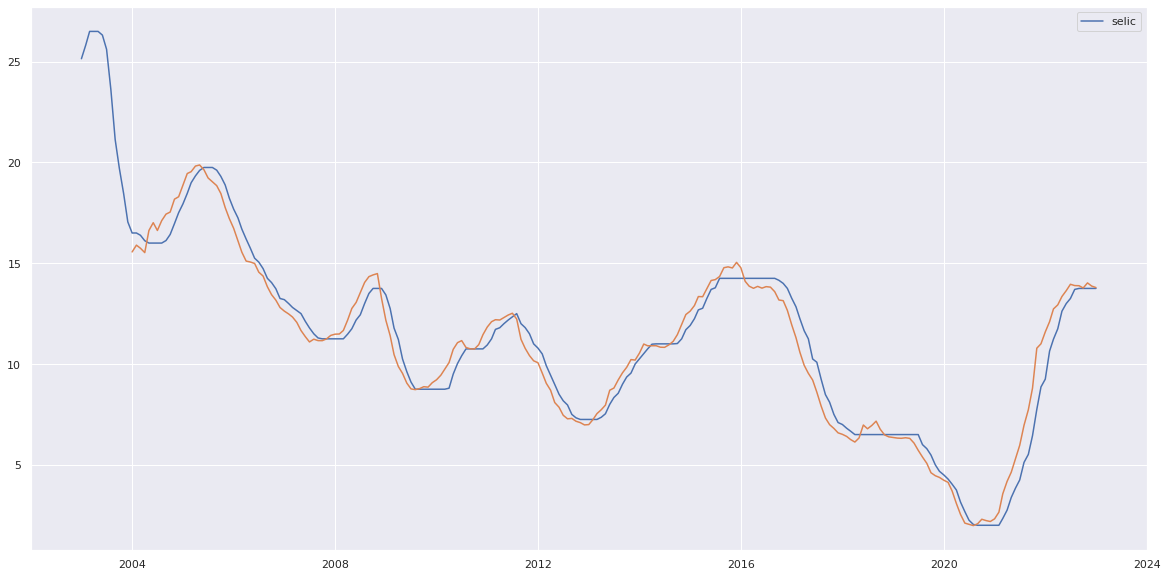

In [38]:
plt.plot(selic,label='selic')
plt.plot(ettj_26['VALUE ((% a.a.))'])
plt.legend()

##Importando dados de sondagens da industria
A sondagem constitui-se em importante ferramenta para a tomada de decisões empresariais no âmbito privado, para a análise econômica realizada no meio acadêmico e de consultoria e na elaboração da política econômica pelo governo.

O questionário da pesquisa contém perguntas direcionadas à empresa como um todo. Nesta categoria estão enquadrados, por exemplo, os quesitos relacionados ao nível de utilização da capacidade instalada e ao contingente de mão de obra. As demais perguntas são direcionadas às principais linhas da empresa, caso dos quesitos relacionados à demanda interna e externa, estoques, situação dos negócios e produção. Informações no nível do produto permitem uma consolidação mais eficiente das respostas no plano setorial.

Trimestralmente são acrescentados quesitos ao questionário como os relativos aos fatores limitativos à expansão da produção, e avaliações sobre preços de matérias-primas e componentes nos mercados interno e externo.

In [39]:
"""import re
import requests
from bs4 import BeautifulSoup
url = 'https://www.portaldaindustria.com.br/estatisticas/sondagem-industrial/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Encontre todos os links
links = soup.find_all('a')

# Defina a parte fixa do link
fixed_link = 'https://static.portaldaindustria.com.br/media/filer_public/0f/35/0f35b96a-96bb-4ae3-b801-66cc796a0129'

# Use a expressão regular para encontrar o link desejado
for link in links:
    href = link.get('href')
    match = re.search(fixed_link + r'/sondagemindustrial_serie-recente_.*.xls', href)
    if match:
      url = match.group()
      print(url)"""


"import re\nimport requests\nfrom bs4 import BeautifulSoup\nurl = 'https://www.portaldaindustria.com.br/estatisticas/sondagem-industrial/'\nresponse = requests.get(url)\nsoup = BeautifulSoup(response.content, 'html.parser')\n\n# Encontre todos os links\nlinks = soup.find_all('a')\n\n# Defina a parte fixa do link\nfixed_link = 'https://static.portaldaindustria.com.br/media/filer_public/0f/35/0f35b96a-96bb-4ae3-b801-66cc796a0129'\n\n# Use a expressão regular para encontrar o link desejado\nfor link in links:\n    href = link.get('href')\n    match = re.search(fixed_link + r'/sondagemindustrial_serie-recente_.*.xls', href)\n    if match:\n      url = match.group()\n      print(url)"

In [40]:
"""response = requests.get(url)
open(f"si.xls", "wb").write(response.content)
df = pd.read_excel("si.xls", sheet_name=10,skiprows=7)
df = df.iloc[0:1,1:]
df =pd.DataFrame(df.iloc[0,:])
df.columns = ['producao']
month_dict = {'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04', 'mai': '05', 'jun': '06',
              'jul': '07', 'ago': '08', 'set': '09', 'out': '10', 'nov': '11', 'dez': '12'}
lista = []
for i in df['data']:
    if type(i) == str:
        b = i[0:3].lower()
        lista.append("20"+str(i)[3:5]+"-"+ month_dict.get(b) +"-01")
    else:
        lista.append(str(i))
df['data'] = lista
df['data'] = df['data'].str.replace('20t1','2017')
df.dropna(axis=0,inplace=True)
df.index = pd.to_datetime(df['data'])
df.drop(columns='data',inplace=True)
df"""

'response = requests.get(url)\nopen(f"si.xls", "wb").write(response.content)\ndf = pd.read_excel("si.xls", sheet_name=10,skiprows=7)\ndf = df.iloc[0:1,1:]\ndf =pd.DataFrame(df.iloc[0,:])\ndf.columns = [\'producao\']\nmonth_dict = {\'jan\': \'01\', \'fev\': \'02\', \'mar\': \'03\', \'abr\': \'04\', \'mai\': \'05\', \'jun\': \'06\',\n              \'jul\': \'07\', \'ago\': \'08\', \'set\': \'09\', \'out\': \'10\', \'nov\': \'11\', \'dez\': \'12\'}\nlista = []\nfor i in df[\'data\']:\n    if type(i) == str:\n        b = i[0:3].lower()\n        lista.append("20"+str(i)[3:5]+"-"+ month_dict.get(b) +"-01")\n    else:\n        lista.append(str(i))\ndf[\'data\'] = lista\ndf[\'data\'] = df[\'data\'].str.replace(\'20t1\',\'2017\')\ndf.dropna(axis=0,inplace=True)\ndf.index = pd.to_datetime(df[\'data\'])\ndf.drop(columns=\'data\',inplace=True)\ndf'

In [41]:
def sondagem_industria(sheet, variable):
    # Download the excel file
  import re
  import pandas as pd
  import requests
  from tempfile import NamedTemporaryFile
  import re
  import requests
  from bs4 import BeautifulSoup
  ##pagina para fazer web scraping
  url = 'https://www.portaldaindustria.com.br/estatisticas/sondagem-industrial/'
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

  # Encontre todos os links
  links = soup.find_all('a')

# Defina a parte fixa do link
  fixed_link = 'https://static.portaldaindustria.com.br/media/filer_public/0f/35/0f35b96a-96bb-4ae3-b801-66cc796a0129'

# Use a expressão regular para encontrar o link desejado
  for link in links:
    href = link.get('href')
    match = re.search(fixed_link + r'/sondagemindustrial_serie-recente_.*.xls', href)
    if match:
      url = match.group()

  response = requests.get(url)
  open(f"si.xls", "wb").write(response.content)
  df = pd.read_excel("si.xls", sheet_name=sheet,skiprows=7)
  df = df.iloc[0:1,1:]
  df =pd.DataFrame(df.iloc[0,:])
  df.columns = [variable]
  lista=[]
  for i in df.index:
    if type(i) == str:
      b= np.where(i[0:3] == 'jan','01',np.where(i[0:3] == 'fev','02',np.where(i[0:3] == 'mar','03',np.where(i[0:3] == 'abr','04',np.where(i[0:3] == 'mai','05',np.where(i[0:3] == 'jun','06',
      np.where(i[0:3] == 'jul','07',np.where(i[0:3] == 'ago','08',np.where(i[0:3] == 'set','09',np.where(i[0:3] == 'out','10',np.where(i[0:3] == 'nov','11',np.where(i[0:3] == 'dez','12',i[0:3]))))))))))))
      lista.append("20"+str(i)[3:5]+"-"+str(b)+"-01")
    else:
      lista.append(str(i))
  df['data'] = lista
  df['data'] = df['data'].str.replace('20t1','2017')
  df.dropna(axis=0,inplace=True)
  df.index = pd.to_datetime(df['data'])
  df.drop(columns='data',inplace=True)
  df[variable] = df[variable].astype(float)
  return df


In [42]:
##Tem que diminuir um valor das sheets pois comeca em zero, entao no arquivo exel sond_estoque 5
sond_estoques = sondagem_industria(4, "sond_estoques")
sond_demanda = sondagem_industria(6, "sond_demanda")
sond_exportacao = sondagem_industria(7, "sond_exportacao")
sond_compras = sondagem_industria(8, "sond_compras")
sond_empregados = sondagem_industria(9, "sond_empregados")

In [43]:
sond_empregados

sond_empregados
data                       
2007-04-01             52.8
2007-07-01             53.4
2007-10-01             53.5
2008-01-01             53.4
2008-04-01             54.5
...                     ...
2022-09-01             53.9
2022-10-01             52.3
2022-11-01             49.0
2022-12-01             49.0
2023-01-01             49.0

[160 rows x 1 columns]

##Juntando os dados


In [44]:
dados= pd.DataFrame(index=pd.date_range(start=data_inicio,end=date.today(),freq='MS'))

In [45]:
dados['trafego_pesado'] = trafego_pesado['pesado']
dados['producao_ind'] = producao_ind['VALUE ((% a.a.))']
dados['producao_ind_int'] = producao_ind_int['VALUE (-)']
dados['capacidade_instalada'] = capacidade_instalada['VALUE ((%))']
dados['caixas'] = round(caixas['VALUE (Tonelada)'],2)
dados['faturamento'] = round(faturamento['VALUE (-)'])
dados['importacoes'] = importacoes['VALUE (-)']
dados['importacoes_int'] = importacoes_int['VALUE (-)']
dados['confianca_empresario_exp'] = confianca_empresario_exp['VALUE (-)']
dados['confianca_empresario_atual'] = confianca_empresario_atual['VALUE (-)']
dados['confianca_consumidor'] =confianca_consumidor['VALUE (-)']
dados['producao_de_veiculos'] = veiculos['Producao_de_veiculos']
dados['producao_aco'] = producao_aco['Producao_de_aco']
dados['sond_compras'] = sond_compras['sond_compras']
dados['sond_estoques'] = sond_estoques['sond_estoques']
dados['sond_demanda'] = sond_demanda['sond_demanda']
dados['sond_exportacao'] = sond_exportacao['sond_exportacao']
dados['sond_empregados'] = sond_empregados['sond_empregados']
dados['selic'] = selic['Selic']
dados['ettj_26'] = ettj_26['VALUE ((% a.a.))']

In [46]:
dados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-01-01      104.405426      2.193232          80.44376   
2003-02-01      100.670444      2.965599          77.56646   
2003-03-01      110.228054      0.018282          87.11254   
2003-04-01      111.028933     -3.858137          84.51989   
2003-05-01      116.094954     -0.952090          87.89121   

            capacidade_instalada     caixas  faturamento  importacoes  \
2003-01-01                  79.5  192570.98         88.0        39.01   
2003-02-01                  79.2  188701.42         90.0        40.05   
2003-03-01                  79.8  198670.82         92.0        38.37   
2003-04-01                  79.3  197587.54         89.0        42.09   
2003-05-01                  80.2  191781.32         93.0        41.02   

            importacoes_int  confianca_empresario_exp  \
2003-01-01            38.81                       NaN   
2003-02-01            39.99                       NaN   
2003-03-01            39.08                       NaN   
2003-04-01            41.27                       NaN   
2003-05-01            43.55                       NaN   

            confianca_empresario_atual  confianca_consumidor  \
2003-01-01                         NaN                102.97   
2003-02-01                         NaN                103.53   
2003-03-01                         NaN                101.89   
2003-04-01                         NaN                107.66   
2003-05-01                         NaN                112.04   

            producao_de_veiculos  producao_aco  sond_compras  sond_estoques  \
2003-01-01              132208.0        127.88           NaN            NaN   
2003-02-01              141129.0        118.47           NaN            NaN   
2003-03-01              127486.0        133.11           NaN            NaN   
2003-04-01              130783.0        126.92           NaN            NaN   
2003-05-01              141857.0        134.47           NaN            NaN   

            sond_demanda  sond_exportacao  sond_empregados      selic  ettj_26  
2003-01-01           NaN              NaN              NaN  25.145161      NaN  
2003-02-01           NaN              NaN              NaN  25.821429      NaN  
2003-03-01           NaN              NaN              NaN  26.500000      NaN  
2003-04-01           NaN              NaN              NaN  26.500000      NaN  
2003-05-01           NaN              NaN              NaN  26.500000      NaN

In [47]:
dados.isnull().sum()

trafego_pesado                 1
producao_ind                   2
producao_ind_int               2
capacidade_instalada           2
caixas                         1
faturamento                    2
importacoes                    2
importacoes_int                2
confianca_empresario_exp      84
confianca_empresario_atual    84
confianca_consumidor           1
producao_de_veiculos           1
producao_aco                   1
sond_compras                  73
sond_estoques                 97
sond_demanda                  73
sond_exportacao               85
sond_empregados               81
selic                          0
ettj_26                       12
dtype: int64

In [48]:
colunas_nao = ['confianca_empresario_exp','confianca_empresario_atual','sond_compras','sond_estoques','sond_demanda','sond_exportacao','sond_empregados']

In [49]:
dados = dados.drop(columns=colunas_nao,axis=1)

In [50]:
dados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-01-01      104.405426      2.193232          80.44376   
2003-02-01      100.670444      2.965599          77.56646   
2003-03-01      110.228054      0.018282          87.11254   
2003-04-01      111.028933     -3.858137          84.51989   
2003-05-01      116.094954     -0.952090          87.89121   

            capacidade_instalada     caixas  faturamento  importacoes  \
2003-01-01                  79.5  192570.98         88.0        39.01   
2003-02-01                  79.2  188701.42         90.0        40.05   
2003-03-01                  79.8  198670.82         92.0        38.37   
2003-04-01                  79.3  197587.54         89.0        42.09   
2003-05-01                  80.2  191781.32         93.0        41.02   

            importacoes_int  confianca_consumidor  producao_de_veiculos  \
2003-01-01            38.81                102.97              132208.0   
2003-02-01            39.99                103.53              141129.0   
2003-03-01            39.08                101.89              127486.0   
2003-04-01            41.27                107.66              130783.0   
2003-05-01            43.55                112.04              141857.0   

            producao_aco      selic  ettj_26  
2003-01-01        127.88  25.145161      NaN  
2003-02-01        118.47  25.821429      NaN  
2003-03-01        133.11  26.500000      NaN  
2003-04-01        126.92  26.500000      NaN  
2003-05-01        134.47  26.500000      NaN

In [51]:
dados.isnull().sum()

trafego_pesado           1
producao_ind             2
producao_ind_int         2
capacidade_instalada     2
caixas                   1
faturamento              2
importacoes              2
importacoes_int          2
confianca_consumidor     1
producao_de_veiculos     1
producao_aco             1
selic                    0
ettj_26                 12
dtype: int64

##Salvando os dados

In [ ]:
dados.to_csv('producao_industrial.csv')

#Visualiçâo dos dados e tratamentos
documentacao plotly:https://plotly.com/python/

In [52]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2003-01-01 to 2023-01-01
Freq: MS
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trafego_pesado        240 non-null    float64
 1   producao_ind          239 non-null    float64
 2   producao_ind_int      239 non-null    float64
 3   capacidade_instalada  239 non-null    float64
 4   caixas                240 non-null    float64
 5   faturamento           239 non-null    float64
 6   importacoes           239 non-null    float64
 7   importacoes_int       239 non-null    float64
 8   confianca_consumidor  240 non-null    float64
 9   producao_de_veiculos  240 non-null    float64
 10  producao_aco          240 non-null    float64
 11  selic                 241 non-null    float64
 12  ettj_26               229 non-null    float64
dtypes: float64(13)
memory usage: 26.4 KB


##Verificando estacionaridade

In [53]:
def test_kpss_adf(dados):
  #https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
  def kpss_test(timeseries):
    """
    O KPSS é outro teste para verificar a estacionaridade de uma série temporal. As hipóteses nula e alternativa para o teste KPSS são opostas às do teste ADF.

    Hipótese Nula: O processo é estacionário de tendência.

    Hipótese Alternativa: A série tem raiz unitária (a série não é estacionária).

    Uma função é criada para realizar o teste KPSS em uma série temporal.
    """
    #print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
      kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    return kpss_output

  def adf_test(timeseries):

    """
    O teste ADF é usado para determinar a presença de raiz unitária na série e, portanto, ajuda a entender se a série é estacionária ou não. As hipóteses nula e 
    alternativa deste teste são:
    Hipótese Nula: A série tem raiz unitária.
    Hipótese alternativa: A série não tem raiz unitária.
    Se a hipótese nula não for rejeitada, este teste pode fornecer evidências de que a série é não estacionária.
   Uma função é criada para realizar o teste ADF em uma série temporal.
    """
    #print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
      dftest[0:4],
      index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
      dfoutput["Critical Value (%s)" % key] = value
    return dfoutput


  test_est = pd.DataFrame(index=dados.columns,columns = ['Teste_kpss', 'Estacionaria_ou_nâo_kpss','Teste_adf','Estacionaria_ou_nâo_adf'])
  for k in dados.columns:
    tes_kpss = kpss_test(dados[k].dropna())
    test_est.loc[k,test_est.columns[0]] = tes_kpss[1]
    tes_adf = adf_test(dados[k].dropna())
    test_est.loc[k,test_est.columns[2]] = tes_adf[1]
  test_est['Estacionaria_ou_nâo_kpss']=np.where(test_est['Teste_kpss'] >= 0.05,'Estacionaria','Nâo estacionaria')
  test_est['Estacionaria_ou_nâo_adf']=np.where(test_est['Teste_adf'] <= 0.05,'Estacionaria','Nâo estacionaria')
  return test_est

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  from statsmodels.tsa.stattools import adfuller
  import pandas as pd
  import matplotlib.pylab as plt
  import seaborn as sns
  import numpy as np
  for i in range(len(timeseries.columns)):
  #Determing rolling statistics
    rolmean = pd.Series(timeseries.iloc[:,i]).rolling(window=12).mean().dropna()
    rolstd = pd.Series(timeseries.iloc[:,i]).rolling(window=12).std().dropna()

    #Plot rolling statistics:
    orig = plt.plot(timeseries.iloc[:,i], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation na variavel {dados.columns[i]}')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print (f'Results of Dickey-Fuller Test:Coluna {dados.columns[i]}')
    dftest = adfuller(timeseries.iloc[:,i].dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  return test_kpss_adf(timeseries)

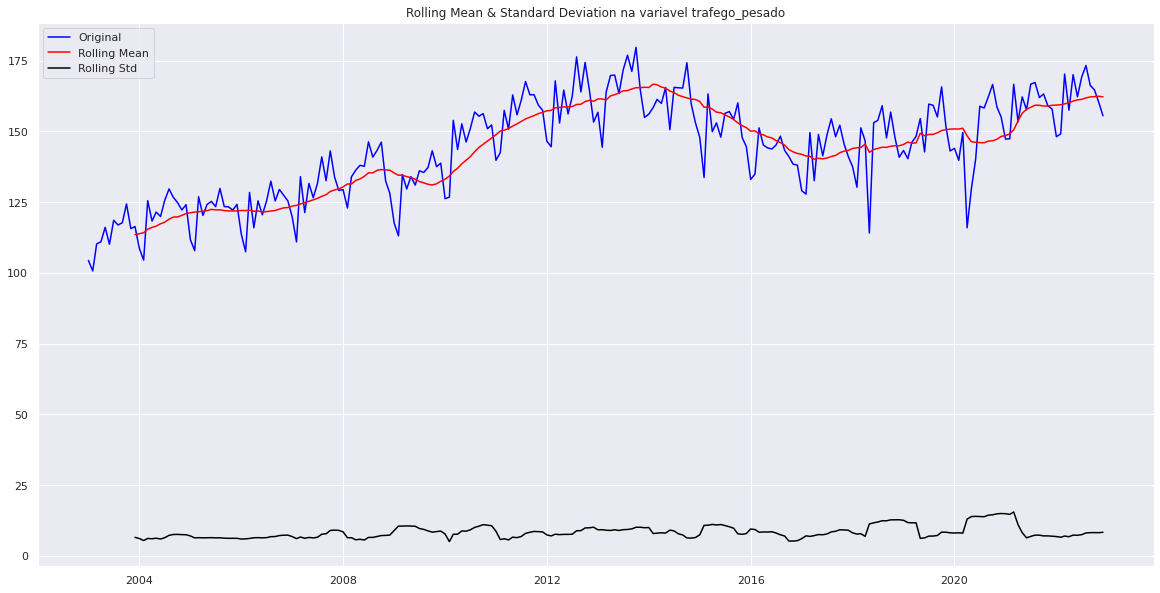

Results of Dickey-Fuller Test:Coluna trafego_pesado
Test Statistic                  -1.599867
p-value                          0.483660
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


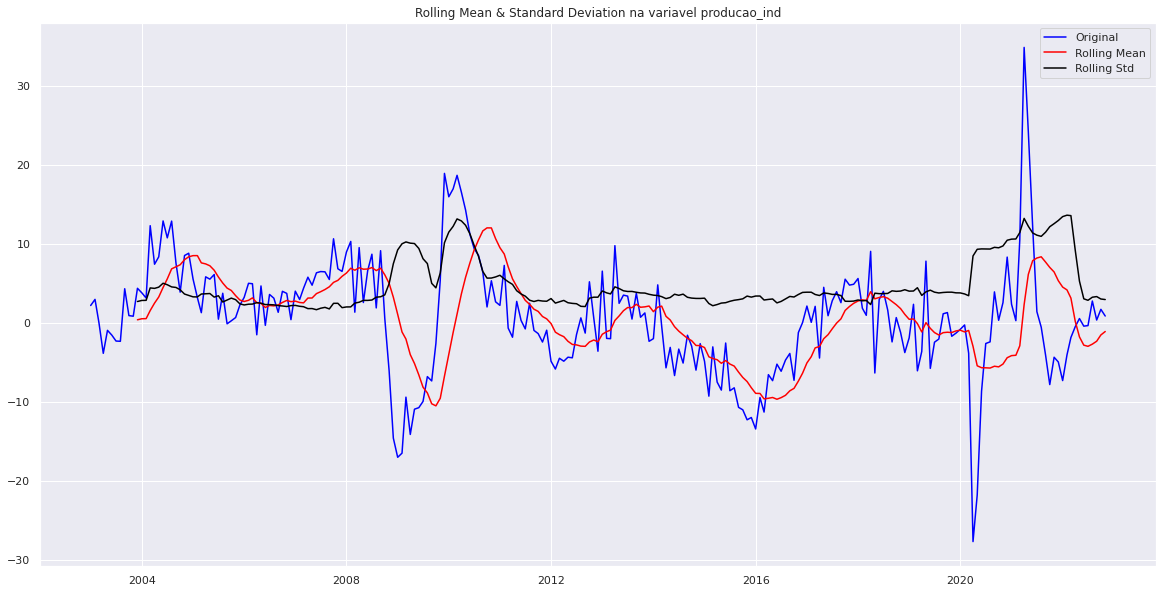

Results of Dickey-Fuller Test:Coluna producao_ind
Test Statistic                  -3.451834
p-value                          0.009314
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


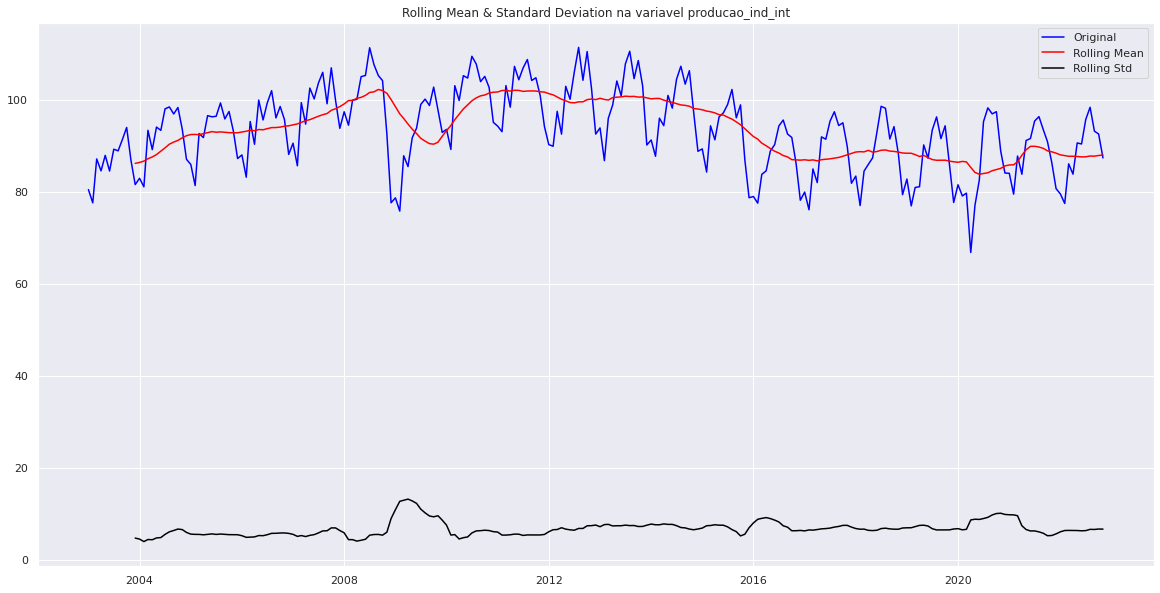

Results of Dickey-Fuller Test:Coluna producao_ind_int
Test Statistic                  -2.098893
p-value                          0.244960
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


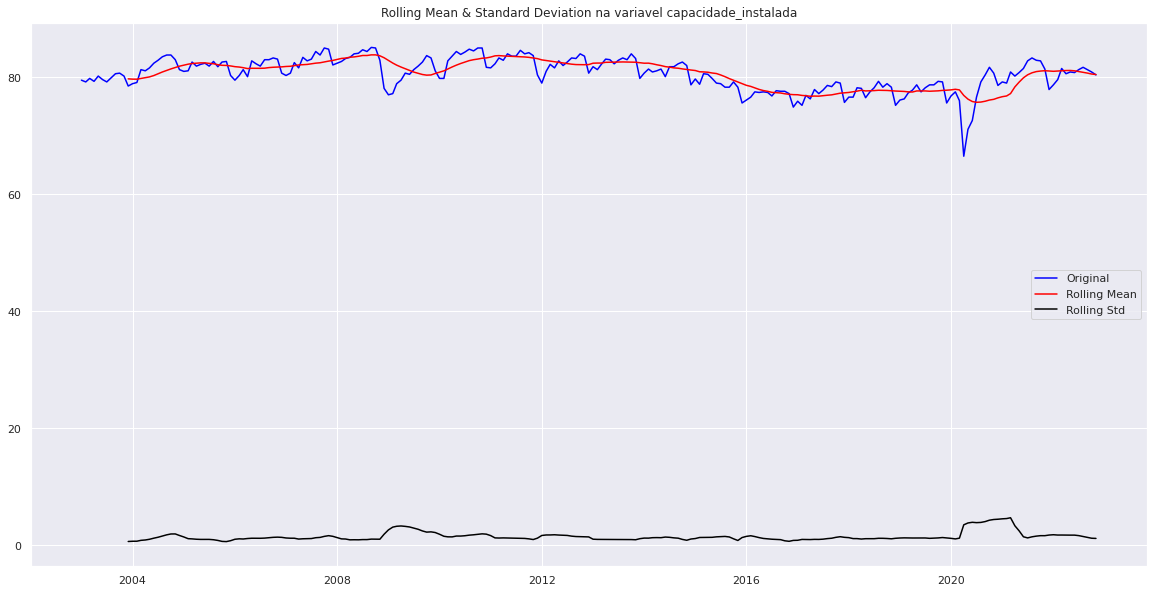

Results of Dickey-Fuller Test:Coluna capacidade_instalada
Test Statistic                  -2.120159
p-value                          0.236486
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


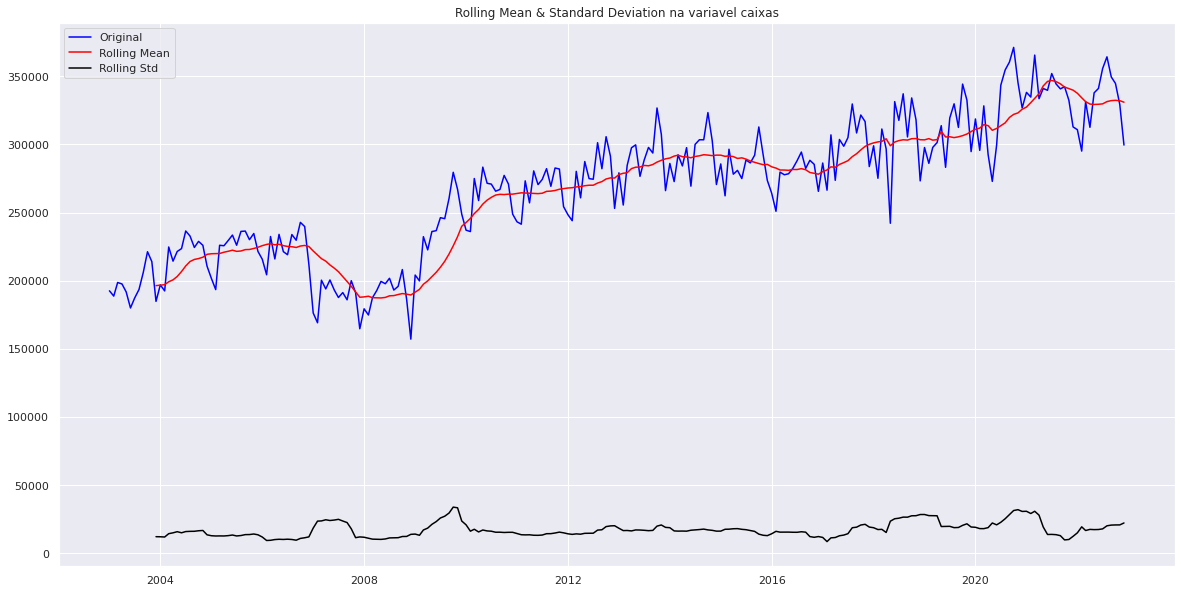

Results of Dickey-Fuller Test:Coluna caixas
Test Statistic                  -1.162991
p-value                          0.689310
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


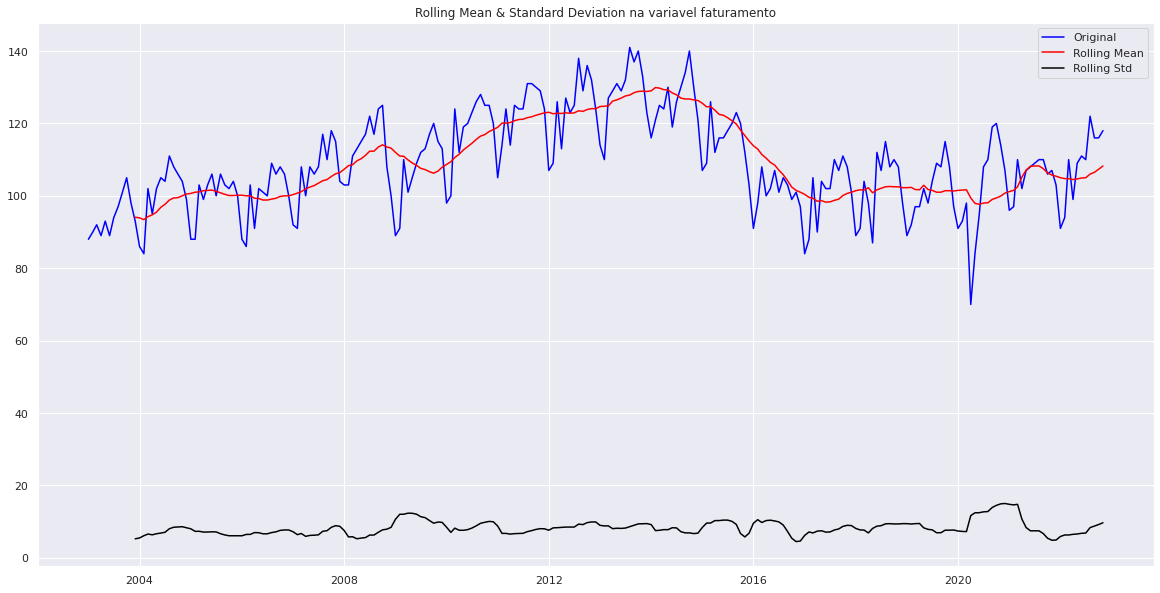

Results of Dickey-Fuller Test:Coluna faturamento
Test Statistic                  -2.114556
p-value                          0.238702
#Lags Used                      13.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


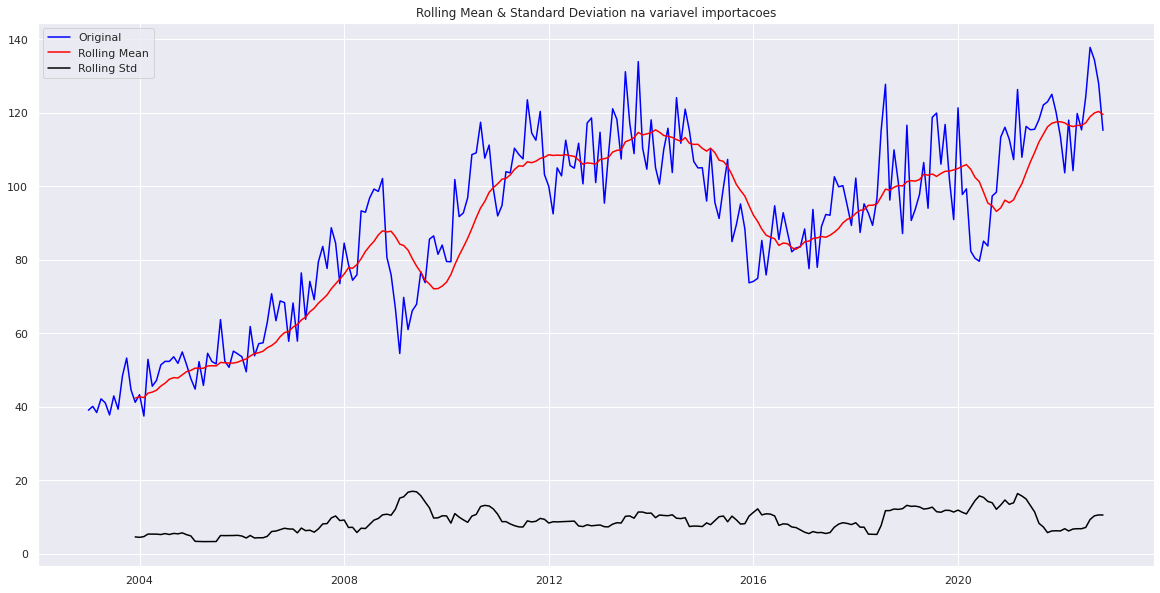

Results of Dickey-Fuller Test:Coluna importacoes
Test Statistic                  -1.979150
p-value                          0.295789
#Lags Used                      15.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


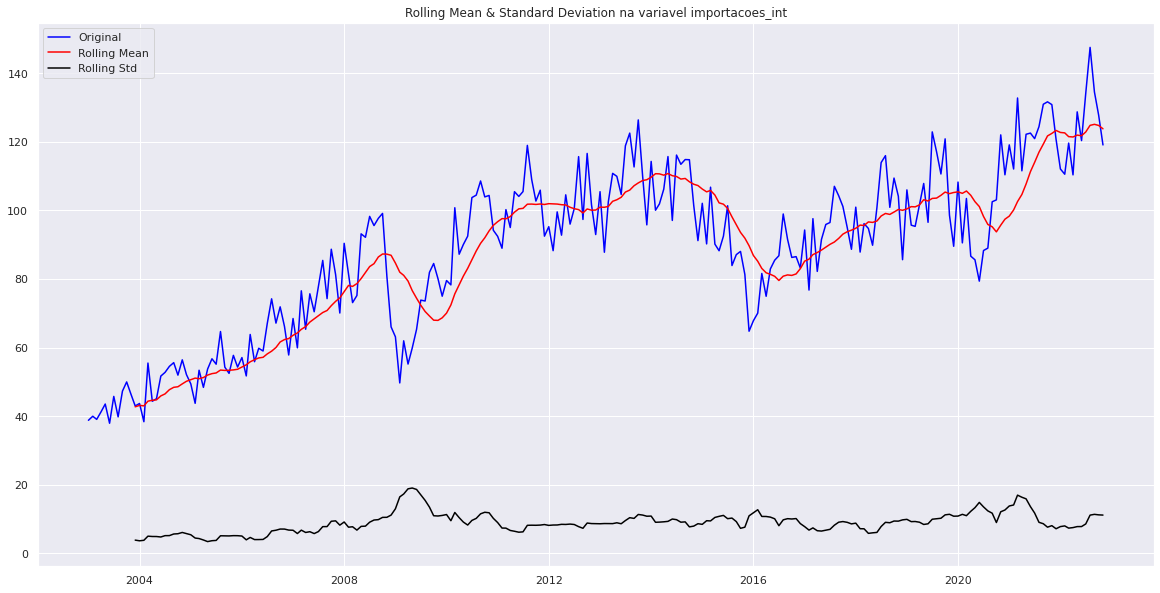

Results of Dickey-Fuller Test:Coluna importacoes_int
Test Statistic                  -1.899225
p-value                          0.332426
#Lags Used                      15.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


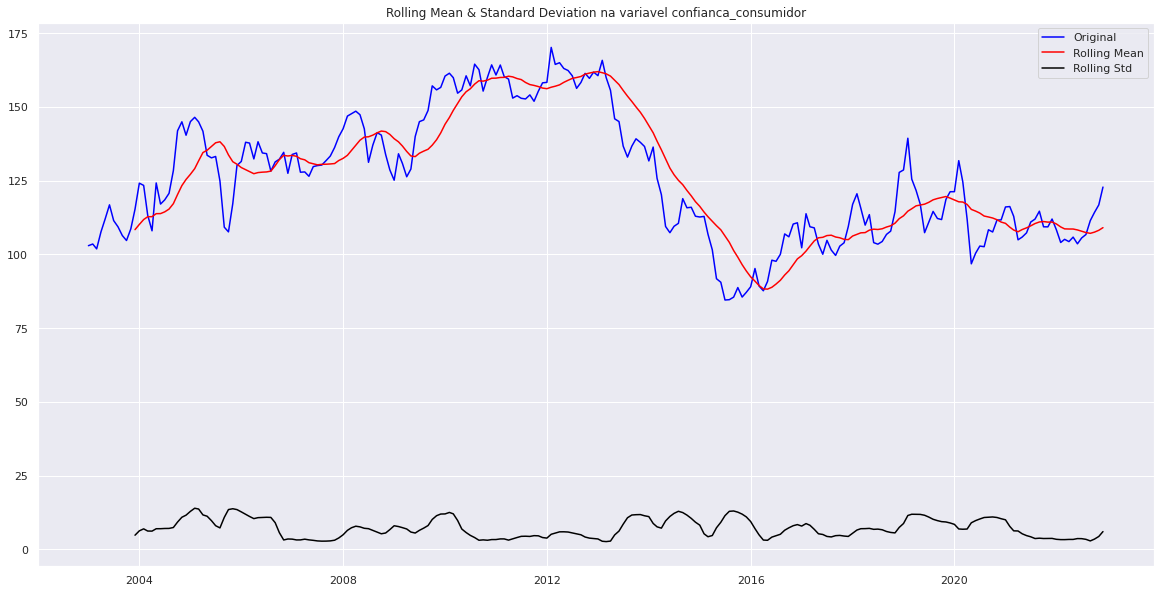

Results of Dickey-Fuller Test:Coluna confianca_consumidor
Test Statistic                  -2.258336
p-value                          0.185758
#Lags Used                       1.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


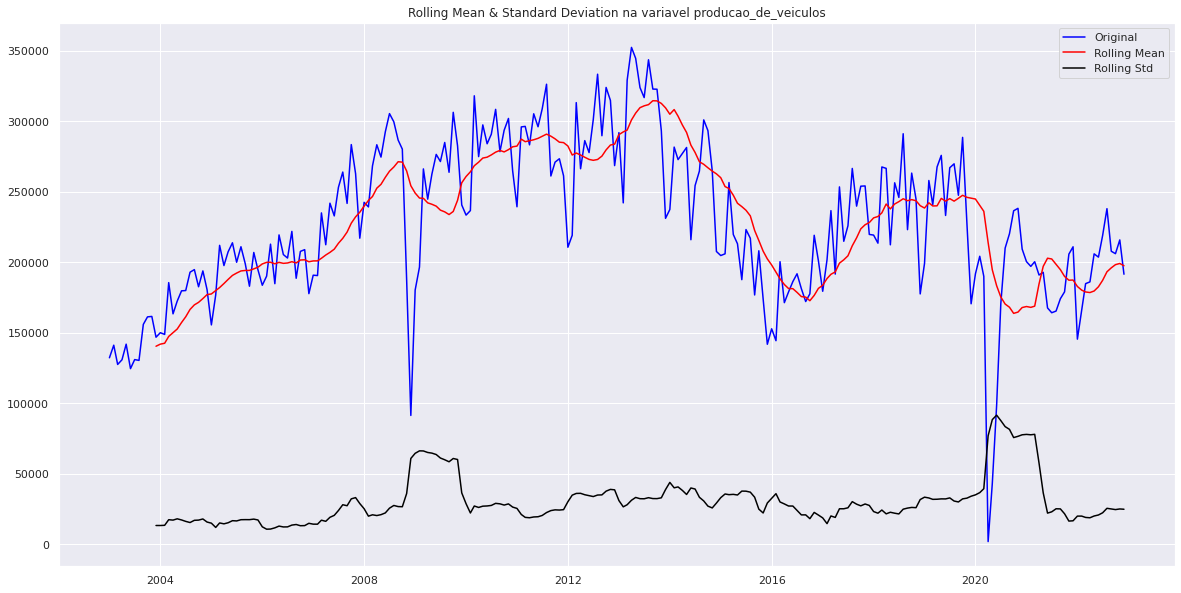

Results of Dickey-Fuller Test:Coluna producao_de_veiculos
Test Statistic                  -2.254343
p-value                          0.187116
#Lags Used                      12.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64


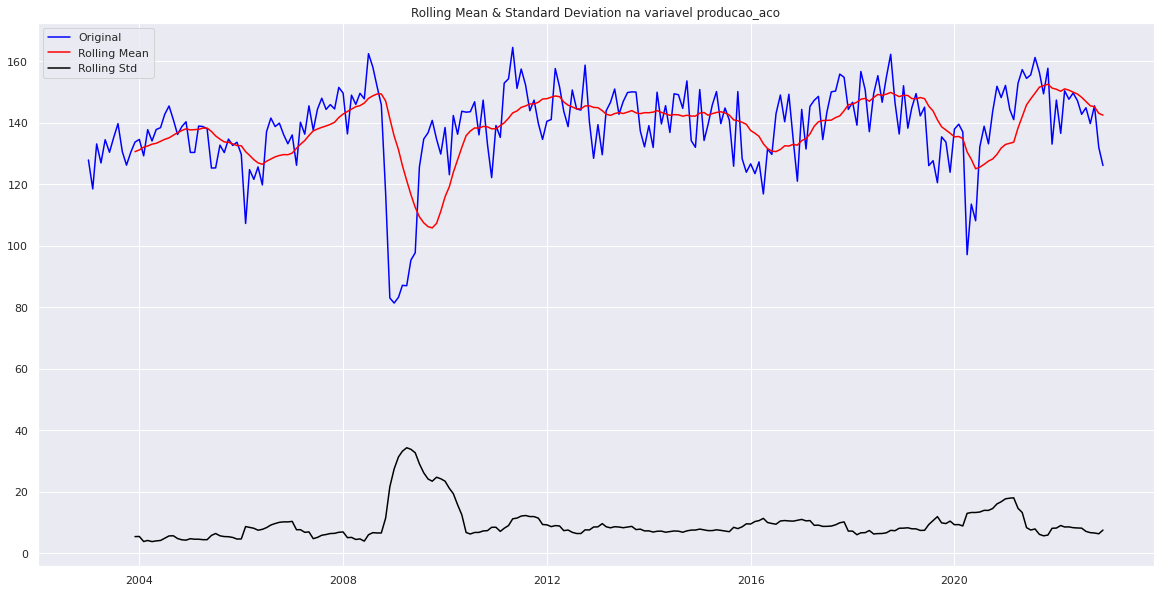

Results of Dickey-Fuller Test:Coluna producao_aco
Test Statistic                  -4.356090
p-value                          0.000355
#Lags Used                      12.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64


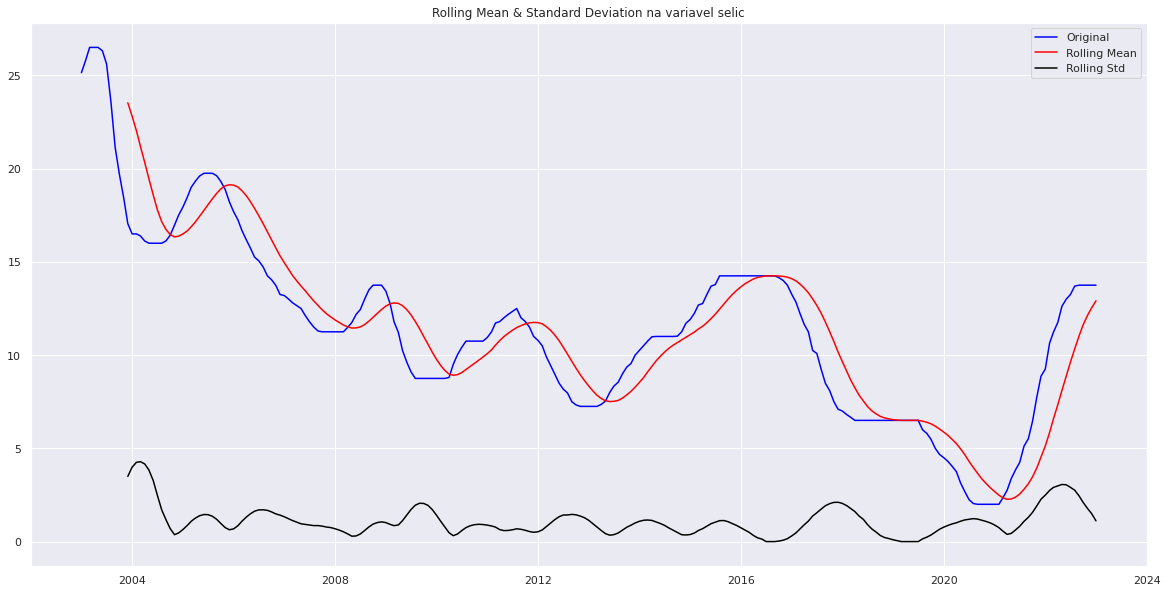

Results of Dickey-Fuller Test:Coluna selic
Test Statistic                  -3.155923
p-value                          0.022682
#Lags Used                       5.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64


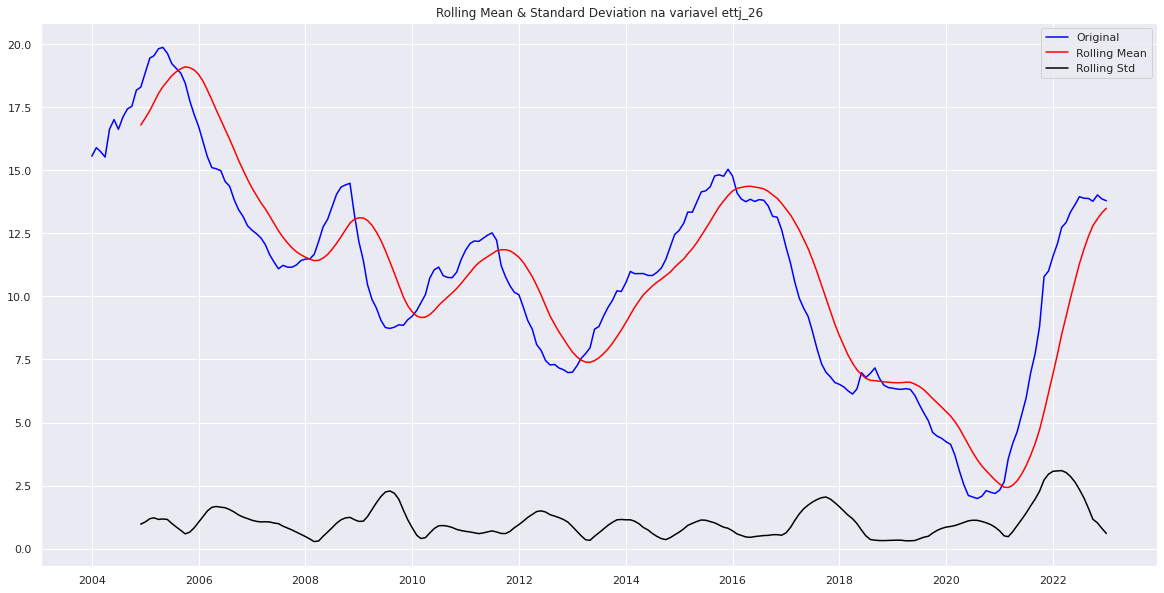

Results of Dickey-Fuller Test:Coluna ettj_26
Test Statistic                  -2.900637
p-value                          0.045274
#Lags Used                       3.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dis

In [54]:
test_estacionario =test_stationarity(dados)

In [55]:
test_estacionario

Teste_kpss Estacionaria_ou_nâo_kpss Teste_adf  \
trafego_pesado             0.01         Nâo estacionaria   0.48366   
producao_ind           0.092393             Estacionaria  0.009314   
producao_ind_int           0.01         Nâo estacionaria   0.24496   
capacidade_instalada       0.01         Nâo estacionaria  0.236486   
caixas                     0.01         Nâo estacionaria   0.68931   
faturamento            0.055529             Estacionaria  0.238702   
importacoes                0.01         Nâo estacionaria  0.295789   
importacoes_int            0.01         Nâo estacionaria  0.332426   
confianca_consumidor       0.01         Nâo estacionaria  0.185758   
producao_de_veiculos    0.06938             Estacionaria  0.187116   
producao_aco           0.092632             Estacionaria  0.000355   
selic                      0.01         Nâo estacionaria  0.022682   
ettj_26                    0.01         Nâo estacionaria  0.045274   

                     Estacionaria_ou_nâo_adf  
trafego_pesado              Nâo estacionaria  
producao_ind                    Estacionaria  
producao_ind_int            Nâo estacionaria  
capacidade_instalada        Nâo estacionaria  
caixas                      Nâo estacionaria  
faturamento                 Nâo estacionaria  
importacoes                 Nâo estacionaria  
importacoes_int             Nâo estacionaria  
confianca_consumidor        Nâo estacionaria  
producao_de_veiculos        Nâo estacionaria  
producao_aco                    Estacionaria  
selic                           Estacionaria  
ettj_26                         Estacionaria

In [56]:
def report_ndiffs (dados,test=['kpss', 'adf', 'pp'],alpha=0.05):
  dat_ndifis = pd.DataFrame(index=dados.columns)
  for i in test:
    dat_n = []
    for j in dados.columns:
      dat_n.append(arima.ndiffs(dados[j].dropna(),alpha,test=i))
    dat_ndifis[i] = dat_n
  result = []
  for k in range(len(dat_ndifis)):
    result.append(np.where(dat_ndifis.iloc[k,0]==dat_ndifis.iloc[k,1],dat_ndifis.iloc[k,0],
         np.where(dat_ndifis.iloc[k,1]==dat_ndifis.iloc[k,2],dat_ndifis.iloc[k,1],
                  np.where(dat_ndifis.iloc[k,0]==dat_ndifis.iloc[k,2],dat_ndifis.iloc[k,2],''))))
  dat_ndifis['Ndifis'] = result
  dat_ndifis.sort_values(by='Ndifis',ascending=False,inplace=True)
  dat_ndifis['Ndifis'] = dat_ndifis['Ndifis'].astype(int)
  return dat_ndifis

In [57]:
ndifis = report_ndiffs(dados)
ndifis

kpss  adf  pp  Ndifis
trafego_pesado           1    1   0       1
caixas                   1    1   0       1
faturamento              1    1   0       1
importacoes              1    1   0       1
importacoes_int          1    1   0       1
confianca_consumidor     1    1   1       1
producao_de_veiculos     1    1   0       1
selic                    1    1   1       1
ettj_26                  1    1   1       1
producao_ind             1    0   0       0
producao_ind_int         1    0   0       0
capacidade_instalada     1    0   0       0
producao_aco             1    0   0       0

##Corrigindo estacionaridade

In [58]:
def corrigindo_nao_estacionaridade(base,n_difis):
  dados_est = base.copy()
  for i in n_difis[n_difis['Ndifis'] >= 1].index:
    if i == 'producao_ind':
      dados_est[i] = dados_est[i]
    else:
      dados_est[i] = dados_est[i].diff(periods=n_difis[n_difis.index.isin([i])]['Ndifis'])
  return dados_est

In [59]:
dados_estacionarios = corrigindo_nao_estacionaridade(dados,ndifis)[1:]
dados_estacionarios.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-02-01       -3.734983      2.965599          77.56646   
2003-03-01        9.557611      0.018282          87.11254   
2003-04-01        0.800879     -3.858137          84.51989   
2003-05-01        5.066021     -0.952090          87.89121   
2003-06-01       -5.994100     -1.553636          84.48595   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-02-01                  79.2  -3869.56          2.0         1.04   
2003-03-01                  79.8   9969.40          2.0        -1.68   
2003-04-01                  79.3  -1083.28         -3.0         3.72   
2003-05-01                  80.2  -5806.22          4.0        -1.07   
2003-06-01                  79.6 -11817.34         -4.0        -3.30   

            importacoes_int  confianca_consumidor  producao_de_veiculos  \
2003-02-01             1.18                  0.56                8921.0   
2003-03-01            -0.91                 -1.64              -13643.0   
2003-04-01             2.19                  5.77                3297.0   
2003-05-01             2.28                  4.38               11074.0   
2003-06-01            -5.60                  4.77              -17346.0   

            producao_aco     selic  ettj_26  
2003-02-01        118.47  0.676267      NaN  
2003-03-01        133.11  0.678571      NaN  
2003-04-01        126.92  0.000000      NaN  
2003-05-01        134.47  0.000000      NaN  
2003-06-01        130.39 -0.183333      NaN

In [60]:
report_ndiffs(dados_estacionarios)

kpss  adf  pp  Ndifis
capacidade_instalada     1    1   0       1
trafego_pesado           0    0   0       0
producao_ind             1    0   0       0
producao_ind_int         1    0   0       0
caixas                   0    0   0       0
faturamento              0    0   0       0
importacoes              0    0   0       0
importacoes_int          0    0   0       0
confianca_consumidor     0    0   0       0
producao_de_veiculos     0    0   0       0
producao_aco             1    0   0       0
selic                    0    0   0       0
ettj_26                  0    0   0       0

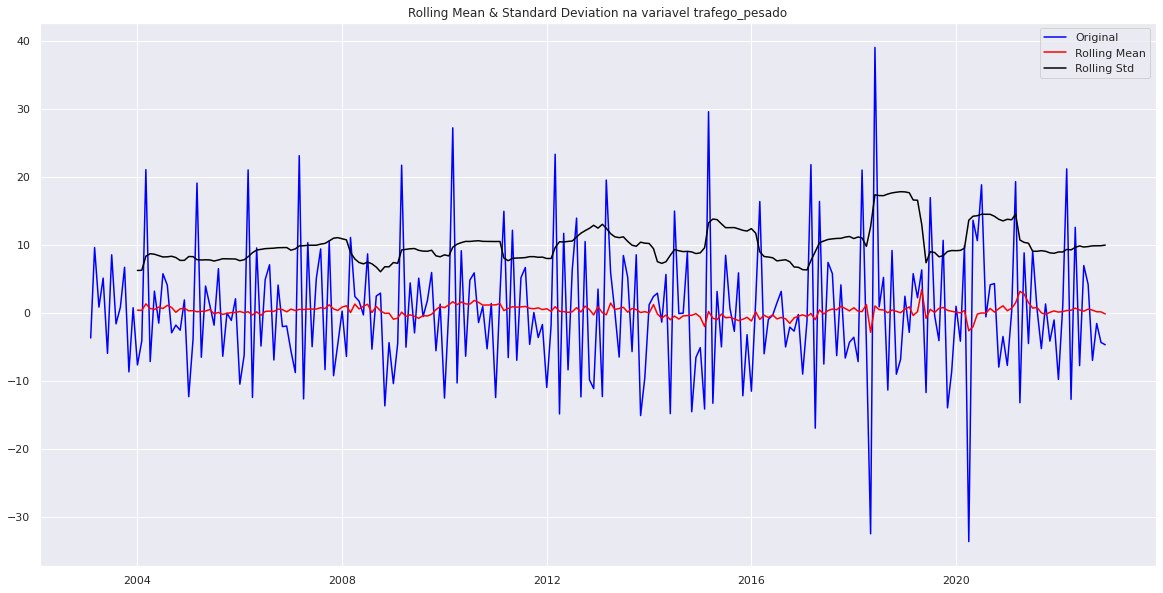

Results of Dickey-Fuller Test:Coluna trafego_pesado
Test Statistic                  -3.803273
p-value                          0.002874
#Lags Used                      13.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


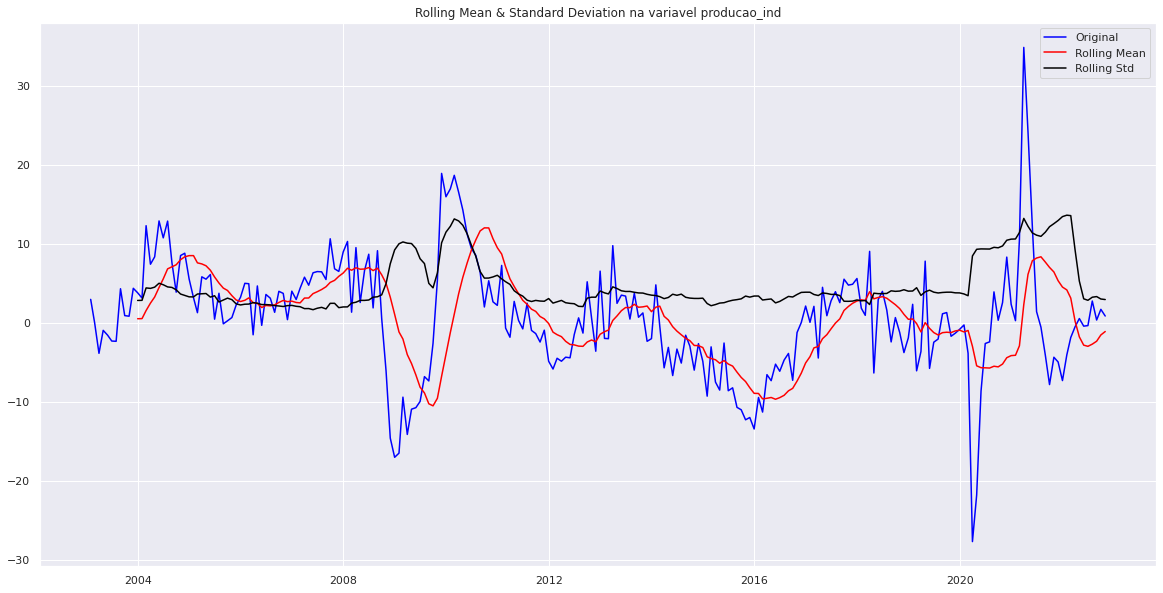

Results of Dickey-Fuller Test:Coluna producao_ind
Test Statistic                  -3.443403
p-value                          0.009565
#Lags Used                      12.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


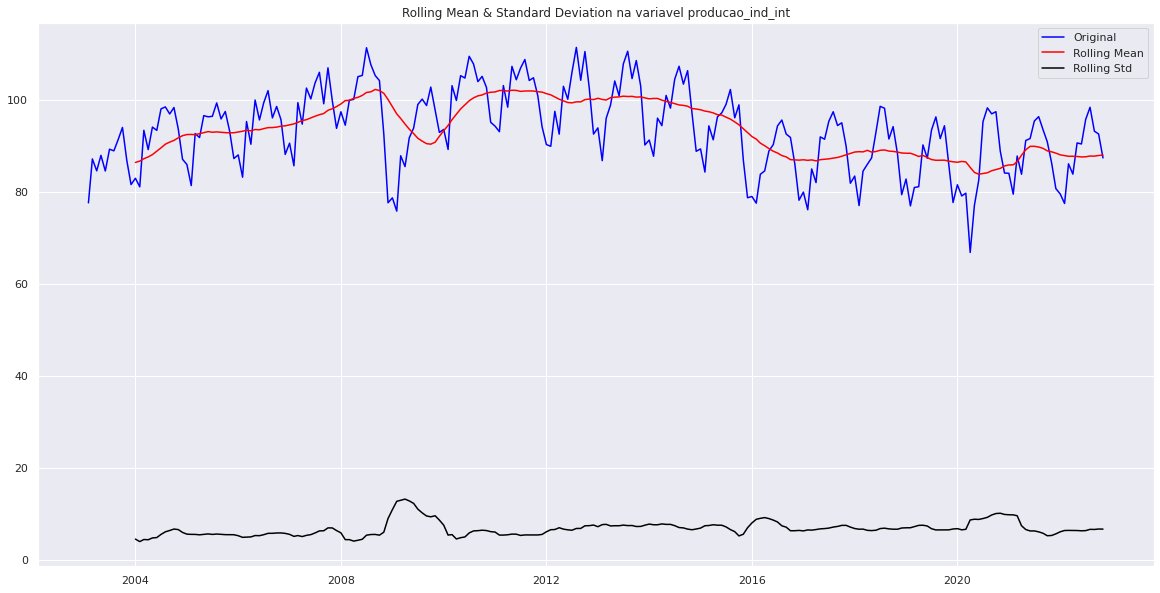

Results of Dickey-Fuller Test:Coluna producao_ind_int
Test Statistic                  -2.055940
p-value                          0.262596
#Lags Used                      12.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


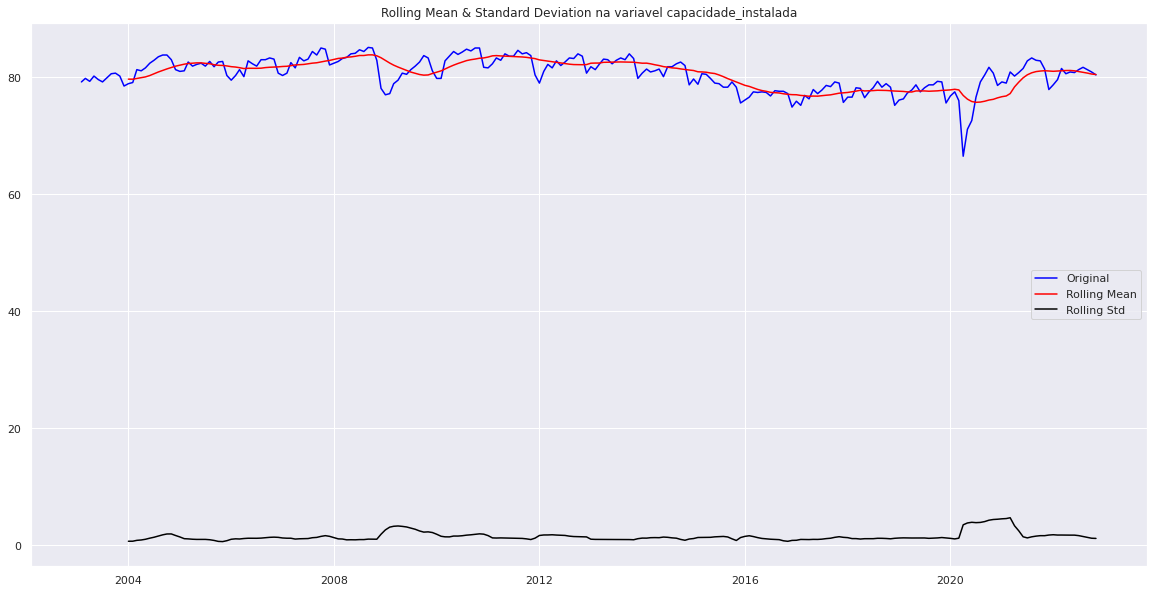

Results of Dickey-Fuller Test:Coluna capacidade_instalada
Test Statistic                  -2.109995
p-value                          0.240515
#Lags Used                      12.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


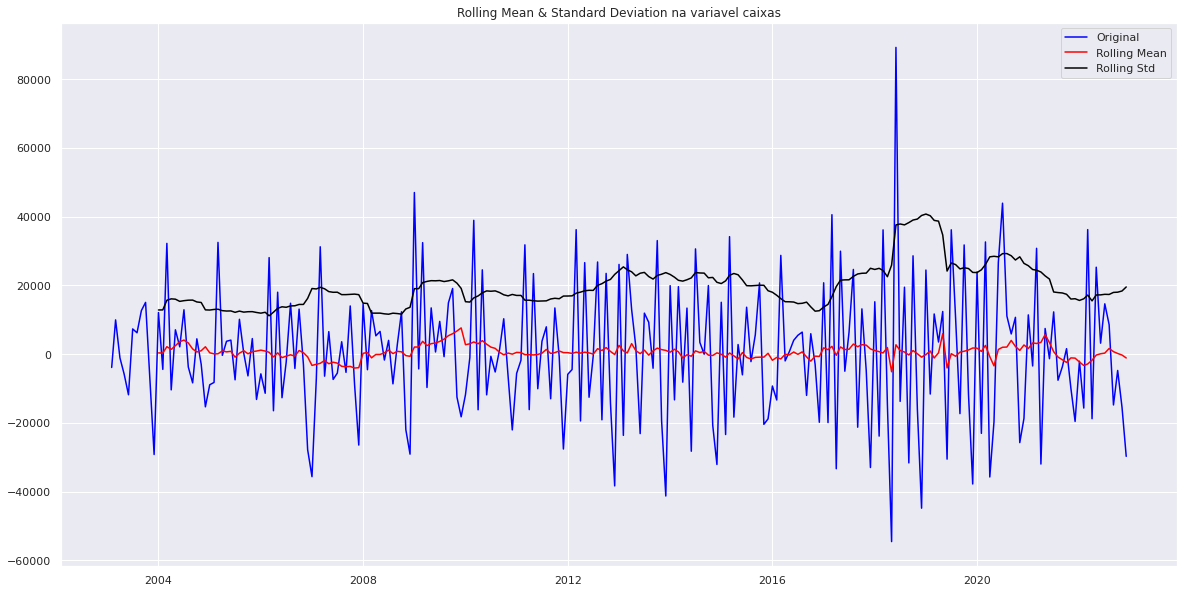

Results of Dickey-Fuller Test:Coluna caixas
Test Statistic                  -3.744851
p-value                          0.003525
#Lags Used                      13.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


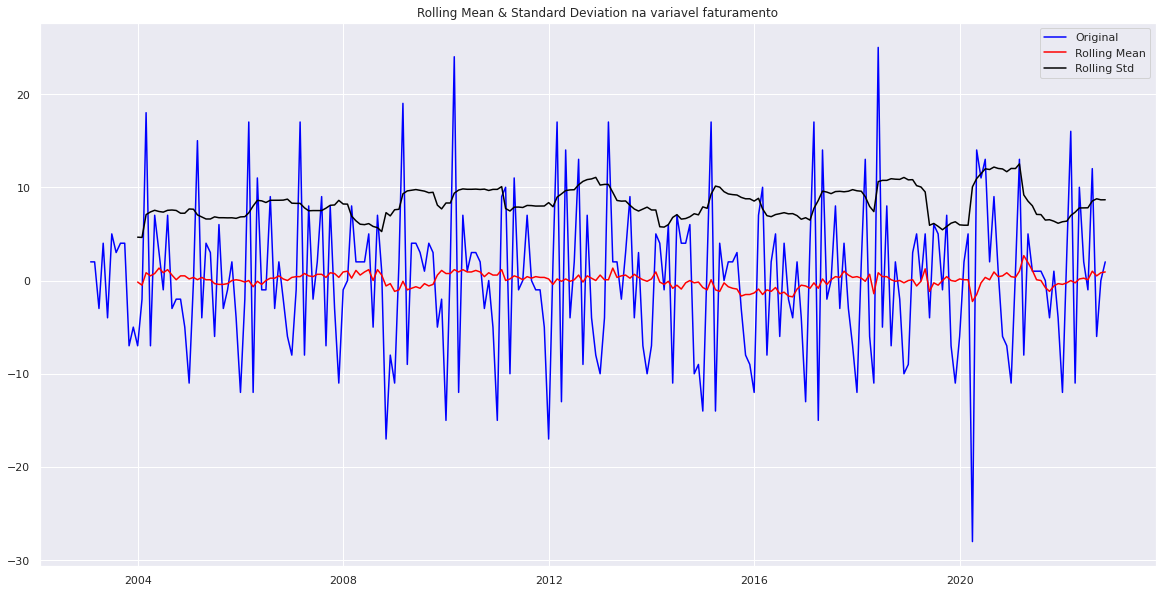

Results of Dickey-Fuller Test:Coluna faturamento
Test Statistic                  -4.235967
p-value                          0.000572
#Lags Used                      12.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


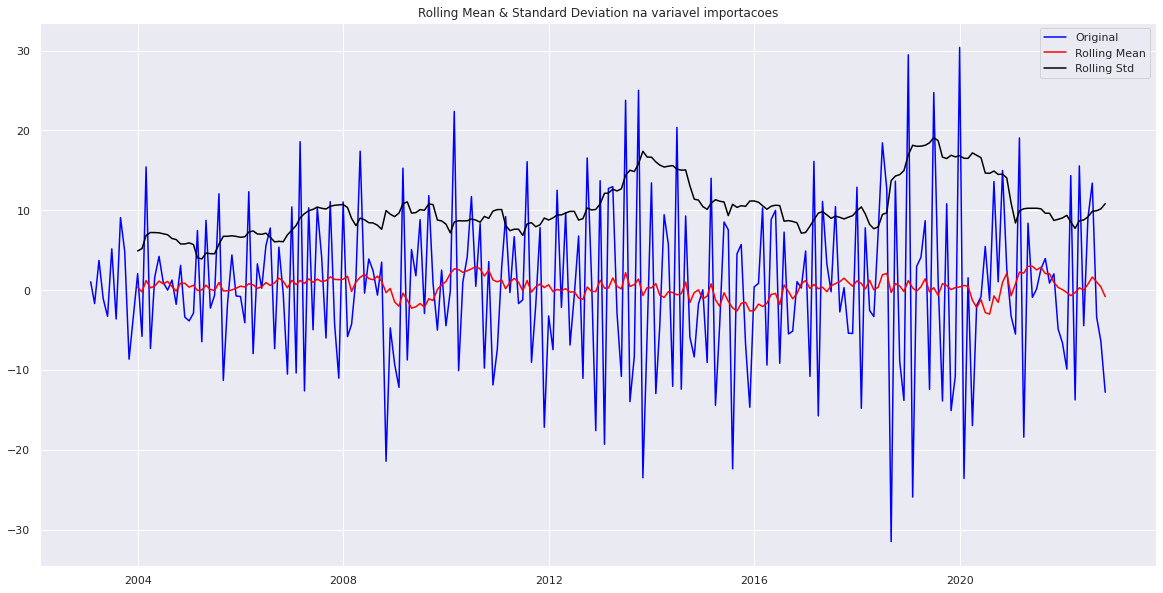

Results of Dickey-Fuller Test:Coluna importacoes
Test Statistic                  -4.446454
p-value                          0.000245
#Lags Used                      15.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


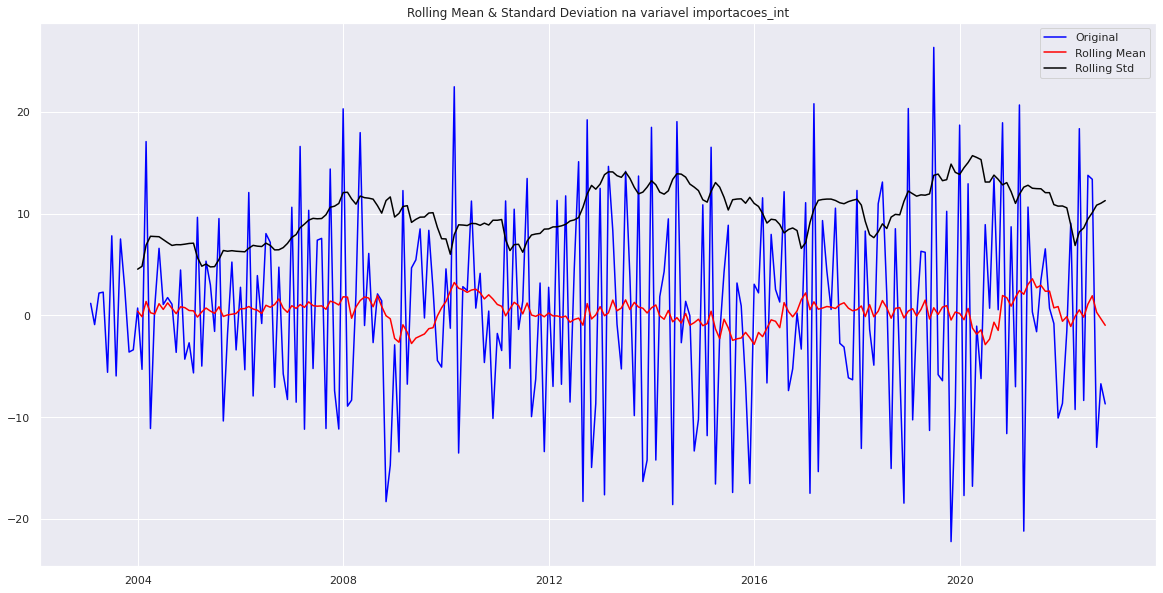

Results of Dickey-Fuller Test:Coluna importacoes_int
Test Statistic                  -4.781960
p-value                          0.000059
#Lags Used                      15.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


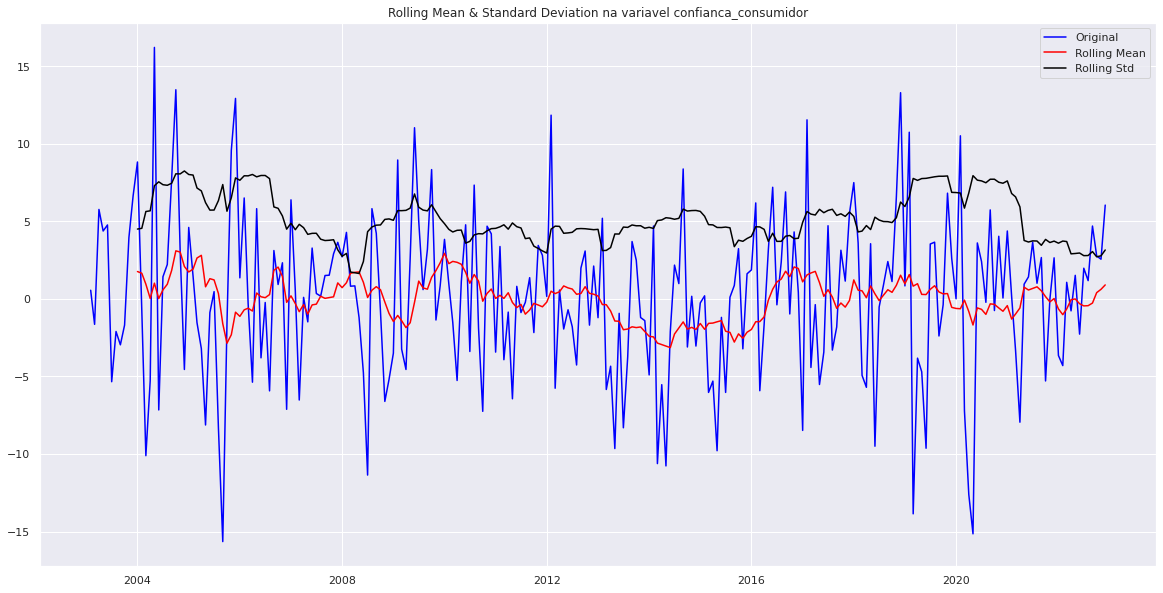

Results of Dickey-Fuller Test:Coluna confianca_consumidor
Test Statistic                -7.430020e+00
p-value                        6.397117e-11
#Lags Used                     6.000000e+00
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


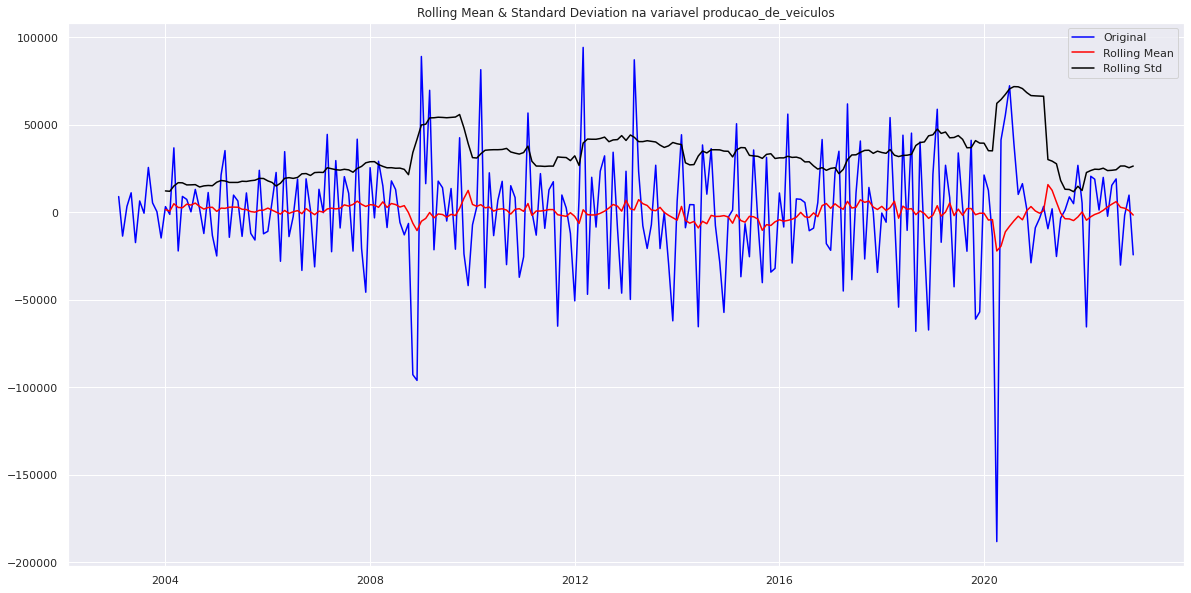

Results of Dickey-Fuller Test:Coluna producao_de_veiculos
Test Statistic                -5.921714e+00
p-value                        2.497475e-07
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


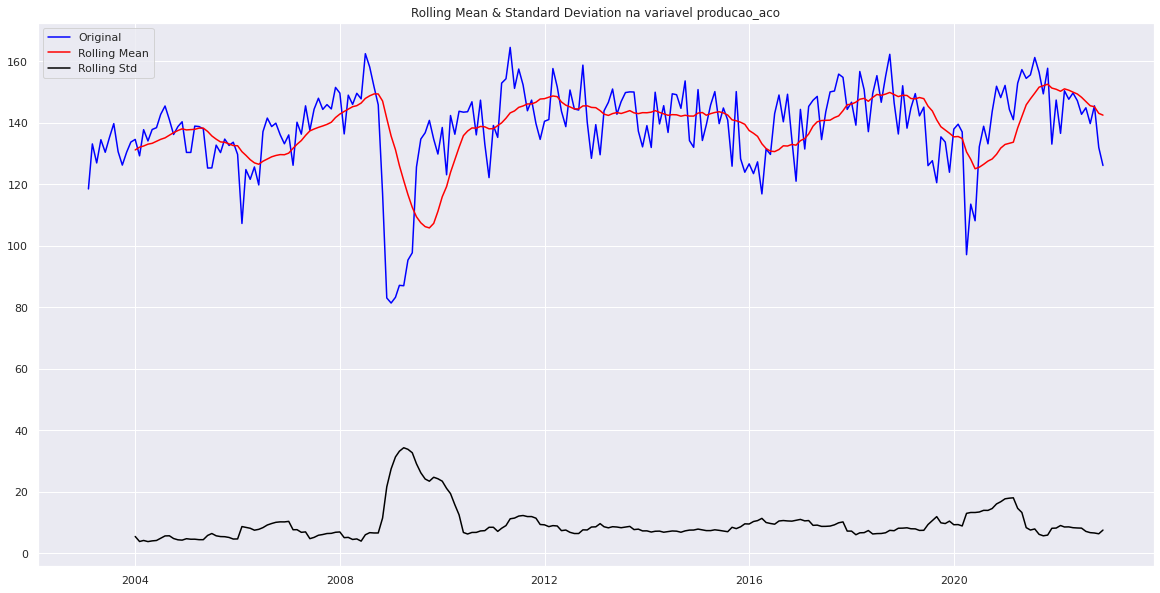

Results of Dickey-Fuller Test:Coluna producao_aco
Test Statistic                  -4.371486
p-value                          0.000333
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


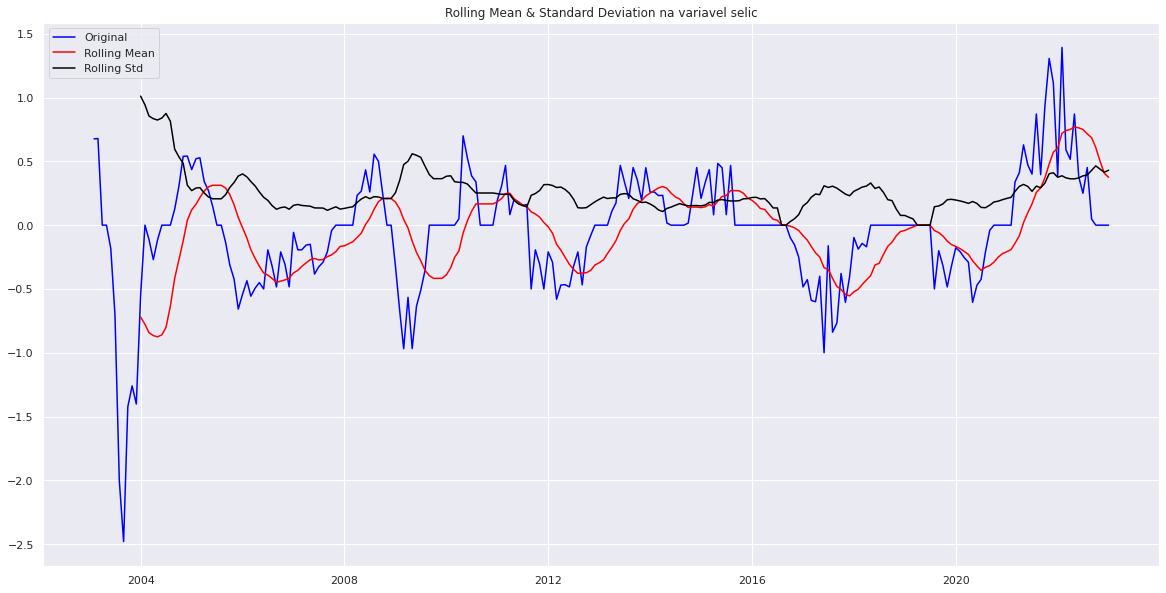

Results of Dickey-Fuller Test:Coluna selic
Test Statistic                  -5.158473
p-value                          0.000011
#Lags Used                       4.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64


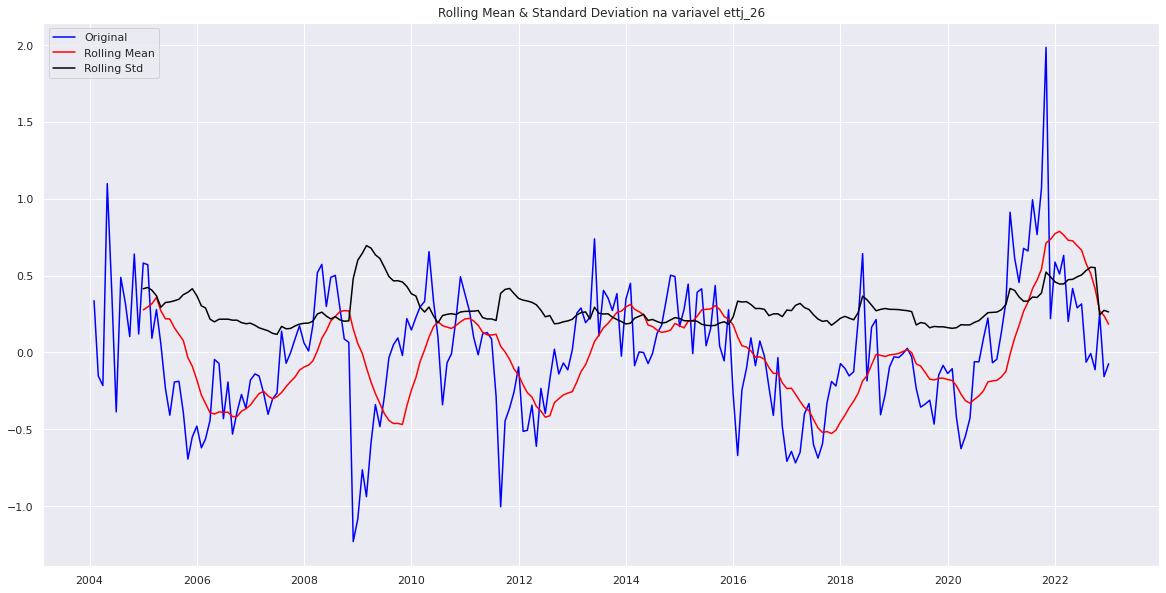

Results of Dickey-Fuller Test:Coluna ettj_26
Test Statistic                  -4.268327
p-value                          0.000504
#Lags Used                       8.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/usr/local/lib/python3.8/dis

In [61]:
test_estacionario =test_stationarity(dados_estacionarios)

In [62]:
test_estacionario

Teste_kpss Estacionaria_ou_nâo_kpss Teste_adf  \
trafego_pesado              0.1             Estacionaria  0.002874   
producao_ind           0.093186             Estacionaria  0.009565   
producao_ind_int           0.01         Nâo estacionaria  0.262596   
capacidade_instalada       0.01         Nâo estacionaria  0.240515   
caixas                      0.1             Estacionaria  0.003525   
faturamento                 0.1             Estacionaria  0.000572   
importacoes                 0.1             Estacionaria  0.000245   
importacoes_int             0.1             Estacionaria  0.000059   
confianca_consumidor        0.1             Estacionaria       0.0   
producao_de_veiculos        0.1             Estacionaria       0.0   
producao_aco           0.096658             Estacionaria  0.000333   
selic                       0.1             Estacionaria  0.000011   
ettj_26                     0.1             Estacionaria  0.000504   

                     Estacionaria_ou_nâo_adf  
trafego_pesado                  Estacionaria  
producao_ind                    Estacionaria  
producao_ind_int            Nâo estacionaria  
capacidade_instalada        Nâo estacionaria  
caixas                          Estacionaria  
faturamento                     Estacionaria  
importacoes                     Estacionaria  
importacoes_int                 Estacionaria  
confianca_consumidor            Estacionaria  
producao_de_veiculos            Estacionaria  
producao_aco                    Estacionaria  
selic                           Estacionaria  
ettj_26                         Estacionaria

##Corrigindo valores NA (Passados)

In [63]:
dados_estacionarios.isnull().sum()

trafego_pesado           1
producao_ind             2
producao_ind_int         2
capacidade_instalada     2
caixas                   1
faturamento              2
importacoes              2
importacoes_int          2
confianca_consumidor     1
producao_de_veiculos     1
producao_aco             1
selic                    0
ettj_26                 12
dtype: int64

In [64]:
def preencher_dados_faltantes(dados):
  """
  #A função acima preenche os dados faltantes de um dataframe com valores gerados aleatoriamente a partir da média e desvio padrão das colunas. Ela utiliza a função fillna do pandas para preencher os valores faltantes, 
  #e gera esses valores aleatórios com a função np.random.normal do numpy. A semente aleatória é definida como 0 para reproduzir os resultados.
  """
  dados_sem_na = dados.copy()
  np.random.seed(0) # definindo semente aleatória para reproduzir resultados
  for j in dados_sem_na.columns:
    if dados[j].isnull().sum() >= 10:
      dados_sem_na[j+'_dummy'] = np.where(dados_sem_na[j].astype(str) != 'nan', 1,0)
    for i in range(dados_sem_na[j].isnull().sum()-dados[j][-20:].isnull().sum()):
      a = np.random.normal(dados_sem_na[j].mean(),dados_sem_na[j].std(),1)
      dados_sem_na[j] = dados_sem_na[j].fillna(int(a),limit=1)
  return dados_sem_na


In [65]:
dados_sem_na = preencher_dados_faltantes(dados_estacionarios)
dados_sem_na.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-02-01       -3.734983      2.965599          77.56646   
2003-03-01        9.557611      0.018282          87.11254   
2003-04-01        0.800879     -3.858137          84.51989   
2003-05-01        5.066021     -0.952090          87.89121   
2003-06-01       -5.994100     -1.553636          84.48595   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-02-01                  79.2  -3869.56          2.0         1.04   
2003-03-01                  79.8   9969.40          2.0        -1.68   
2003-04-01                  79.3  -1083.28         -3.0         3.72   
2003-05-01                  80.2  -5806.22          4.0        -1.07   
2003-06-01                  79.6 -11817.34         -4.0        -3.30   

            importacoes_int  confianca_consumidor  producao_de_veiculos  \
2003-02-01             1.18                  0.56                8921.0   
2003-03-01            -0.91                 -1.64              -13643.0   
2003-04-01             2.19                  5.77                3297.0   
2003-05-01             2.28                  4.38               11074.0   
2003-06-01            -5.60                  4.77              -17346.0   

            producao_aco     selic  ettj_26  ettj_26_dummy  
2003-02-01        118.47  0.676267      0.0              0  
2003-03-01        133.11  0.678571      0.0              0  
2003-04-01        126.92  0.000000      0.0              0  
2003-05-01        134.47  0.000000      0.0              0  
2003-06-01        130.39 -0.183333      0.0              0

In [66]:
dados_sem_na.tail()

trafego_pesado  producao_ind  producao_ind_int  \
2022-09-01       -7.028647      0.354030          93.14152   
2022-10-01       -1.601791      1.706088          92.52996   
2022-11-01       -4.400137      0.860787          87.32752   
2022-12-01       -4.733451           NaN               NaN   
2023-01-01             NaN           NaN               NaN   

            capacidade_instalada   caixas  faturamento  importacoes  \
2022-09-01                  81.3 -14779.0         -6.0        -3.39   
2022-10-01                  80.9  -4745.0          0.0        -6.40   
2022-11-01                  80.4 -15483.0          2.0       -12.79   
2022-12-01                   NaN -29739.0          NaN          NaN   
2023-01-01                   NaN      NaN          NaN          NaN   

            importacoes_int  confianca_consumidor  producao_de_veiculos  \
2022-09-01           -12.98                  4.70              -30199.0   
2022-10-01            -6.73                  2.77               -1718.0   
2022-11-01            -8.71                  2.56                9752.0   
2022-12-01              NaN                  6.05              -24339.0   
2023-01-01              NaN                   NaN                   NaN   

            producao_aco     selic   ettj_26  ettj_26_dummy  
2022-09-01        139.72  0.048387 -0.006787              1  
2022-10-01        145.49  0.000000 -0.112663              1  
2022-11-01        131.96  0.000000  0.252505              1  
2022-12-01        126.09  0.000000 -0.157740              1  
2023-01-01           NaN  0.000000 -0.074325              1

In [67]:
##https://plotly.com/python/bubble-charts/
import plotly.express as px
import plotly.graph_objs as go
for j,i in enumerate(dados_sem_na.columns):
  if dados_sem_na.columns.str.contains("dummy")[j] != True:
    fig = go.Figure()
    #fig = ploty.scatter(data_frame=dados, x=dados.index, y='confianca_empresario_exp',name='confianca_empresario_exp')
    #fig.add_trace(go.Scatter(x=dados.index, y=dados['confianca_empresario_exp'], name='confianca_empresario_exp',mode='markers',marker=dict(size=10,color='green')))
    fig.add_trace(go.Scatter(x=dados_sem_na.index, y=dados_sem_na[i], name=f'{i} sem NA',marker=dict(color='red')))
    fig.add_trace(go.Scatter(x=dados_estacionarios.index, y=dados_estacionarios[i], name=i,marker=dict(color='green')))
    fig.update_layout(autosize=False, width=2000, height=1000)
    fig.show()
  else:
    None

In [68]:
dados_sem_na.columns.str.contains("dummy")[10] != True

True

In [69]:
for i,j in enumerate(dados_sem_na.columns):
  if dados_sem_na.columns.str.contains("dummy")[i] != True:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=dados_sem_na[j],name='Com NA', texttemplate = "%{y}",textfont_size=20))
    fig.add_trace(go.Histogram(x=dados_estacionarios[j],name='Sem NA',texttemplate = "%{y}",textfont_size=20))
    # Overlay both histograms
    #fig.update_layout(barmode='stack')
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.55)
    fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
    fig.show()
  else:
    None

##Corrigindo valores NA (Futuro)

In [70]:
dados_sem_na.isnull().sum()

trafego_pesado          1
producao_ind            2
producao_ind_int        2
capacidade_instalada    2
caixas                  1
faturamento             2
importacoes             2
importacoes_int         2
confianca_consumidor    1
producao_de_veiculos    1
producao_aco            1
selic                   0
ettj_26                 0
ettj_26_dummy           0
dtype: int64

In [71]:
dados_sem = dados_sem_na.copy()
for k in dados_sem_na.columns[dados_sem.isnull().sum() > 0]:
  model_arima = arima.auto_arima(dados_sem[k].dropna().values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
  model_arima.fit(dados_sem[k].values)
  a = model_arima.predict(n_periods=int(dados_sem[k].isnull().sum()))
  for i in a:
    dados_sem[k] = dados_sem[k].fillna(i,limit=1)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1712.899, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1769.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1724.563, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1717.885, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1708.378, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1723.087, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1709.815, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1710.189, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1711.154, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1724.952, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1708.423, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1707.614, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1712.151, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1724.684, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept

In [72]:
dados_sem.tail()

trafego_pesado  producao_ind  producao_ind_int  \
2022-09-01       -7.028647      0.354030         93.141520   
2022-10-01       -1.601791      1.706088         92.529960   
2022-11-01       -4.400137      0.860787         87.327520   
2022-12-01       -4.733451      0.512951         89.819179   
2023-01-01        0.673355      0.421349         90.801961   

            capacidade_instalada        caixas  faturamento  importacoes  \
2022-09-01             81.300000 -14779.000000    -6.000000    -3.390000   
2022-10-01             80.900000  -4745.000000     0.000000    -6.400000   
2022-11-01             80.400000 -15483.000000     2.000000   -12.790000   
2022-12-01             80.517908 -29739.000000    -1.020670     1.699619   
2023-01-01             80.594831   3556.294201    -0.598323     2.581931   

            importacoes_int  confianca_consumidor  producao_de_veiculos  \
2022-09-01       -12.980000              4.700000         -30199.000000   
2022-10-01        -6.730000              2.770000          -1718.000000   
2022-11-01        -8.710000              2.560000           9752.000000   
2022-12-01         0.912267              6.050000         -24339.000000   
2023-01-01        -0.430021              0.062623           1710.261574   

            producao_aco     selic   ettj_26  ettj_26_dummy  
2022-09-01    139.720000  0.048387 -0.006787              1  
2022-10-01    145.490000  0.000000 -0.112663              1  
2022-11-01    131.960000  0.000000  0.252505              1  
2022-12-01    126.090000  0.000000 -0.157740              1  
2023-01-01    128.907824  0.000000 -0.074325              1

In [73]:
for j,i in enumerate(dados_sem_na.columns):
  if dados_sem_na.columns.str.contains("dummy")[j] != True:
    fig = go.Figure()
    #fig = ploty.scatter(data_frame=dados, x=dados.index, y='confianca_empresario_exp',name='confianca_empresario_exp')
    #fig.add_trace(go.Scatter(x=dados.index, y=dados['confianca_empresario_exp'], name='confianca_empresario_exp',mode='markers',marker=dict(size=10,color='green')))
    fig.add_trace(go.Scatter(x=dados_sem.index, y=dados_sem[i], name=i,marker=dict(color='green')))
    fig.add_trace(go.Scatter(x=dados_sem_na.index, y=dados_sem_na[i], name=f'{i} Com NA',marker=dict(color='red')))
    fig.update_layout(autosize=False, width=2000, height=1000)
    fig.show()

In [74]:
dados_sem.isnull().sum()

trafego_pesado          0
producao_ind            0
producao_ind_int        0
capacidade_instalada    0
caixas                  0
faturamento             0
importacoes             0
importacoes_int         0
confianca_consumidor    0
producao_de_veiculos    0
producao_aco            0
selic                   0
ettj_26                 0
ettj_26_dummy           0
dtype: int64

##Epandir base criando defasagens

In [75]:
def criando_defasagens(base,numero_defasagens=4):
  base_def = base.copy()
  for j in range(numero_defasagens):
    for k,i in enumerate(base.columns):
      if base.columns.str.contains("dummy")[k] != True:
        base_def[i+str('_lags_')+str(j+1)] = base_def[i].shift(j+1)
  return base_def

In [76]:
dados_defasados = criando_defasagens(dados_sem,4)
dados_defasados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-02-01       -3.734983      2.965599          77.56646   
2003-03-01        9.557611      0.018282          87.11254   
2003-04-01        0.800879     -3.858137          84.51989   
2003-05-01        5.066021     -0.952090          87.89121   
2003-06-01       -5.994100     -1.553636          84.48595   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-02-01                  79.2  -3869.56          2.0         1.04   
2003-03-01                  79.8   9969.40          2.0        -1.68   
2003-04-01                  79.3  -1083.28         -3.0         3.72   
2003-05-01                  80.2  -5806.22          4.0        -1.07   
2003-06-01                  79.6 -11817.34         -4.0        -3.30   

            importacoes_int  confianca_consumidor  producao_de_veiculos  ...  \
2003-02-01             1.18                  0.56                8921.0  ...   
2003-03-01            -0.91                 -1.64              -13643.0  ...   
2003-04-01             2.19                  5.77                3297.0  ...   
2003-05-01             2.28                  4.38               11074.0  ...   
2003-06-01            -5.60                  4.77              -17346.0  ...   

            capacidade_instalada_lags_4  caixas_lags_4  faturamento_lags_4  \
2003-02-01                          NaN            NaN                 NaN   
2003-03-01                          NaN            NaN                 NaN   
2003-04-01                          NaN            NaN                 NaN   
2003-05-01                          NaN            NaN                 NaN   
2003-06-01                         79.2       -3869.56                 2.0   

            importacoes_lags_4  importacoes_int_lags_4  \
2003-02-01                 NaN                     NaN   
2003-03-01                 NaN                     NaN   
2003-04-01                 NaN                     NaN   
2003-05-01                 NaN                     NaN   
2003-06-01                1.04                    1.18   

            confianca_consumidor_lags_4  producao_de_veiculos_lags_4  \
2003-02-01                          NaN                          NaN   
2003-03-01                          NaN                          NaN   
2003-04-01                          NaN                          NaN   
2003-05-01                          NaN                          NaN   
2003-06-01                         0.56                       8921.0   

            producao_aco_lags_4  selic_lags_4  ettj_26_lags_4  
2003-02-01                  NaN           NaN             NaN  
2003-03-01                  NaN           NaN             NaN  
2003-04-01                  NaN           NaN             NaN  
2003-05-01                  NaN           NaN             NaN  
2003-06-01               118.47      0.676267             0.0  

[5 rows x 66 columns]

In [77]:
dados_defasados.dropna(inplace=True)

In [78]:
dados_defasados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-06-01       -5.994100     -1.553636          84.48595   
2003-07-01        8.494886     -2.305300          89.22375   
2003-08-01       -1.657895     -2.335371          88.87035   
2003-09-01        0.789117      4.313285          91.36703   
2003-10-01        6.661507      0.914177          93.95489   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-06-01                  79.6 -11817.34         -4.0        -3.30   
2003-07-01                  79.2   7340.55          5.0         5.17   
2003-08-01                  79.9   6217.28          3.0        -3.62   
2003-09-01                  80.6  12671.97          4.0         9.08   
2003-10-01                  80.7  15059.68          4.0         4.84   

            importacoes_int  confianca_consumidor  producao_de_veiculos  ...  \
2003-06-01            -5.60                  4.77              -17346.0  ...   
2003-07-01             7.82                 -5.34                6419.0  ...   
2003-08-01            -5.96                 -2.10                -577.0  ...   
2003-09-01             7.51                 -2.96               25548.0  ...   
2003-10-01             2.67                 -1.69                5322.0  ...   

            capacidade_instalada_lags_4  caixas_lags_4  faturamento_lags_4  \
2003-06-01                         79.2       -3869.56                 2.0   
2003-07-01                         79.8        9969.40                 2.0   
2003-08-01                         79.3       -1083.28                -3.0   
2003-09-01                         80.2       -5806.22                 4.0   
2003-10-01                         79.6      -11817.34                -4.0   

            importacoes_lags_4  importacoes_int_lags_4  \
2003-06-01                1.04                    1.18   
2003-07-01               -1.68                   -0.91   
2003-08-01                3.72                    2.19   
2003-09-01               -1.07                    2.28   
2003-10-01               -3.30                   -5.60   

            confianca_consumidor_lags_4  producao_de_veiculos_lags_4  \
2003-06-01                         0.56                       8921.0   
2003-07-01                        -1.64                     -13643.0   
2003-08-01                         5.77                       3297.0   
2003-09-01                         4.38                      11074.0   
2003-10-01                         4.77                     -17346.0   

            producao_aco_lags_4  selic_lags_4  ettj_26_lags_4  
2003-06-01               118.47      0.676267             0.0  
2003-07-01               133.11      0.678571             0.0  
2003-08-01               126.92      0.000000             0.0  
2003-09-01               134.47      0.000000             0.0  
2003-10-01               130.39     -0.183333             0.0  

[5 rows x 66 columns]

##Criando variaveis dummies da Producao Industrial Mes

In [79]:
dumm_mes = pd.get_dummies(pd.to_datetime(dados_defasados.index).month)
##Apagando a ultima coluna que todas os numeros zeros irao responder pr ela
dumm_mes.drop(12,axis=1,inplace=True)

In [80]:
dumm_mes.columns = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov']
dumm_mes.index = dados_defasados.index

In [81]:
dumm_mes

jan  fev  mar  abr  mai  jun  jul  ago  set  out  nov
2003-06-01    0    0    0    0    0    1    0    0    0    0    0
2003-07-01    0    0    0    0    0    0    1    0    0    0    0
2003-08-01    0    0    0    0    0    0    0    1    0    0    0
2003-09-01    0    0    0    0    0    0    0    0    1    0    0
2003-10-01    0    0    0    0    0    0    0    0    0    1    0
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2022-09-01    0    0    0    0    0    0    0    0    1    0    0
2022-10-01    0    0    0    0    0    0    0    0    0    1    0
2022-11-01    0    0    0    0    0    0    0    0    0    0    1
2022-12-01    0    0    0    0    0    0    0    0    0    0    0
2023-01-01    1    0    0    0    0    0    0    0    0    0    0

[236 rows x 11 columns]

In [82]:
dados_fin = dados_defasados.join(dumm_mes)
dados_fin.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-06-01       -5.994100     -1.553636          84.48595   
2003-07-01        8.494886     -2.305300          89.22375   
2003-08-01       -1.657895     -2.335371          88.87035   
2003-09-01        0.789117      4.313285          91.36703   
2003-10-01        6.661507      0.914177          93.95489   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-06-01                  79.6 -11817.34         -4.0        -3.30   
2003-07-01                  79.2   7340.55          5.0         5.17   
2003-08-01                  79.9   6217.28          3.0        -3.62   
2003-09-01                  80.6  12671.97          4.0         9.08   
2003-10-01                  80.7  15059.68          4.0         4.84   

            importacoes_int  confianca_consumidor  producao_de_veiculos  ...  \
2003-06-01            -5.60                  4.77              -17346.0  ...   
2003-07-01             7.82                 -5.34                6419.0  ...   
2003-08-01            -5.96                 -2.10                -577.0  ...   
2003-09-01             7.51                 -2.96               25548.0  ...   
2003-10-01             2.67                 -1.69                5322.0  ...   

            fev  mar  abr  mai  jun  jul  ago  set  out  nov  
2003-06-01    0    0    0    0    1    0    0    0    0    0  
2003-07-01    0    0    0    0    0    1    0    0    0    0  
2003-08-01    0    0    0    0    0    0    1    0    0    0  
2003-09-01    0    0    0    0    0    0    0    1    0    0  
2003-10-01    0    0    0    0    0    0    0    0    1    0  

[5 rows x 77 columns]

In [83]:
dados_fin.shape

(236, 77)

##Retirando dados no tempo t

In [84]:
dados_fin.columns

Index(['trafego_pesado', 'producao_ind', 'producao_ind_int',
       'capacidade_instalada', 'caixas', 'faturamento', 'importacoes',
       'importacoes_int', 'confianca_consumidor', 'producao_de_veiculos',
       'producao_aco', 'selic', 'ettj_26', 'ettj_26_dummy',
       'trafego_pesado_lags_1', 'producao_ind_lags_1',
       'producao_ind_int_lags_1', 'capacidade_instalada_lags_1',
       'caixas_lags_1', 'faturamento_lags_1', 'importacoes_lags_1',
       'importacoes_int_lags_1', 'confianca_consumidor_lags_1',
       'producao_de_veiculos_lags_1', 'producao_aco_lags_1', 'selic_lags_1',
       'ettj_26_lags_1', 'trafego_pesado_lags_2', 'producao_ind_lags_2',
       'producao_ind_int_lags_2', 'capacidade_instalada_lags_2',
       'caixas_lags_2', 'faturamento_lags_2', 'importacoes_lags_2',
       'importacoes_int_lags_2', 'confianca_consumidor_lags_2',
       'producao_de_veiculos_lags_2', 'producao_aco_lags_2', 'selic_lags_2',
       'ettj_26_lags_2', 'trafego_pesado_lags_3', 'produca

In [85]:
drop = ['trafego_pesado', 'producao_ind_int',
       'capacidade_instalada', 'caixas', 'faturamento', 'importacoes',
       'importacoes_int', 'confianca_consumidor', 'producao_de_veiculos',
       'producao_aco']

In [86]:
dados_fin.drop(drop,axis=1,inplace=True)

In [87]:
dados_fin

producao_ind     selic   ettj_26  ettj_26_dummy  \
2003-06-01     -1.553636 -0.183333  0.000000              0   
2003-07-01     -2.305300 -0.703763  0.000000              0   
2003-08-01     -2.335371 -2.000000  0.000000              0   
2003-09-01      4.313285 -2.479570  0.000000              0   
2003-10-01      0.914177 -1.423656  0.000000              0   
...                  ...       ...       ...            ...   
2022-09-01      0.354030  0.048387 -0.006787              1   
2022-10-01      1.706088  0.000000 -0.112663              1   
2022-11-01      0.860787  0.000000  0.252505              1   
2022-12-01      0.512951  0.000000 -0.157740              1   
2023-01-01      0.421349  0.000000 -0.074325              1   

            trafego_pesado_lags_1  producao_ind_lags_1  \
2003-06-01               5.066021            -0.952090   
2003-07-01              -5.994100            -1.553636   
2003-08-01               8.494886            -2.305300   
2003-09-01              -1.657895            -2.335371   
2003-10-01               0.789117             4.313285   
...                           ...                  ...   
2022-09-01               4.139583             2.758782   
2022-10-01              -7.028647             0.354030   
2022-11-01              -1.601791             1.706088   
2022-12-01              -4.400137             0.860787   
2023-01-01              -4.733451             0.512951   

            producao_ind_int_lags_1  capacidade_instalada_lags_1  \
2003-06-01                87.891210                    80.200000   
2003-07-01                84.485950                    79.600000   
2003-08-01                89.223750                    79.200000   
2003-09-01                88.870350                    79.900000   
2003-10-01                91.367030                    80.600000   
...                             ...                          ...   
2022-09-01                98.343620                    81.700000   
2022-10-01                93.141520                    81.300000   
2022-11-01                92.529960                    80.900000   
2022-12-01                87.327520                    80.400000   
2023-01-01                89.819179                    80.517908   

            caixas_lags_1  faturamento_lags_1  ...  fev  mar  abr  mai  jun  \
2003-06-01       -5806.22             4.00000  ...    0    0    0    0    1   
2003-07-01      -11817.34            -4.00000  ...    0    0    0    0    0   
2003-08-01        7340.55             5.00000  ...    0    0    0    0    0   
2003-09-01        6217.28             3.00000  ...    0    0    0    0    0   
2003-10-01       12671.97             4.00000  ...    0    0    0    0    0   
...                   ...                 ...  ...  ...  ...  ...  ...  ...   
2022-09-01        8584.00            12.00000  ...    0    0    0    0    0   
2022-10-01      -14779.00            -6.00000  ...    0    0    0    0    0   
2022-11-01       -4745.00             0.00000  ...    0    0    0    0    0   
2022-12-01      -15483.00             2.00000  ...    0    0    0    0    0   
2023-01-01      -29739.00            -1.02067  ...    0    0    0    0    0   

            jul  ago  set  out  nov  
2003-06-01    0    0    0    0    0  
2003-07-01    1    0    0    0    0  
2003-08-01    0    1    0    0    0  
2003-09-01    0    0    1    0    0  
2003-10-01    0    0    0    1    0  
...         ...  ...  ...  ...  ...  
2022-09-01    0    0    1    0    0  
2022-10-01    0    0    0    1    0  
2022-11-01    0    0    0    0    1  
2022-12-01    0    0    0    0    0  
2023-01-01    0    0    0    0    0  

[236 rows x 67 columns]

##Divindo treino e teste

In [88]:
#Dados de validacao
dados_fin_val = dados_fin.iloc[-12:,]
dados_fin_val

producao_ind     selic   ettj_26  ettj_26_dummy  \
2022-02-01     -4.054886  1.392857  0.510043              1   
2022-03-01     -1.851151  0.591014  0.631162              1   
2022-04-01     -0.487505  0.516129  0.201228              1   
2022-05-01      0.544842  0.870968  0.415745              1   
2022-06-01     -0.419292  0.379032  0.290047              1   
2022-07-01     -0.350034  0.250000  0.315167              1   
2022-08-01      2.758782  0.451613 -0.063760              1   
2022-09-01      0.354030  0.048387 -0.006787              1   
2022-10-01      1.706088  0.000000 -0.112663              1   
2022-11-01      0.860787  0.000000  0.252505              1   
2022-12-01      0.512951  0.000000 -0.157740              1   
2023-01-01      0.421349  0.000000 -0.074325              1   

            trafego_pesado_lags_1  producao_ind_lags_1  \
2022-02-01              -9.838707            -7.305336   
2022-03-01               1.048327            -4.054886   
2022-04-01              21.131621            -1.851151   
2022-05-01             -12.770329            -0.487505   
2022-06-01              12.534080             0.544842   
2022-07-01              -7.802331            -0.419292   
2022-08-01               6.912326            -0.350034   
2022-09-01               4.139583             2.758782   
2022-10-01              -7.028647             0.354030   
2022-11-01              -1.601791             1.706088   
2022-12-01              -4.400137             0.860787   
2023-01-01              -4.733451             0.512951   

            producao_ind_int_lags_1  capacidade_instalada_lags_1  \
2022-02-01                79.495480                    78.700000   
2022-03-01                77.427650                    79.600000   
2022-04-01                86.046130                    81.500000   
2022-05-01                83.804310                    80.600000   
2022-06-01                90.585170                    80.900000   
2022-07-01                90.362850                    80.800000   
2022-08-01                95.683780                    81.300000   
2022-09-01                98.343620                    81.700000   
2022-10-01                93.141520                    81.300000   
2022-11-01                92.529960                    80.900000   
2022-12-01                87.327520                    80.400000   
2023-01-01                89.819179                    80.517908   

            caixas_lags_1  faturamento_lags_1  ...  fev  mar  abr  mai  jun  \
2022-02-01        -2061.0           -12.00000  ...    1    0    0    0    0   
2022-03-01       -15684.0             3.00000  ...    0    1    0    0    0   
2022-04-01        36243.0            16.00000  ...    0    0    1    0    0   
2022-05-01       -18788.0           -11.00000  ...    0    0    0    1    0   
2022-06-01        25299.0            10.00000  ...    0    0    0    0    1   
2022-07-01         3195.0             2.00000  ...    0    0    0    0    0   
2022-08-01        14644.0            -1.00000  ...    0    0    0    0    0   
2022-09-01         8584.0            12.00000  ...    0    0    0    0    0   
2022-10-01       -14779.0            -6.00000  ...    0    0    0    0    0   
2022-11-01        -4745.0             0.00000  ...    0    0    0    0    0   
2022-12-01       -15483.0             2.00000  ...    0    0    0    0    0   
2023-01-01       -29739.0            -1.02067  ...    0    0    0    0    0   

            jul  ago  set  out  nov  
2022-02-01    0    0    0    0    0  
2022-03-01    0    0    0    0    0  
2022-04-01    0    0    0    0    0  
2022-05-01    0    0    0    0    0  
2022-06-01    0    0    0    0    0  
2022-07-01    1    0    0    0    0  
2022-08-01    0    1    0    0    0  
2022-09-01    0    0    1    0    0  
2022-10-01    0    0    0    1    0  
2022-11-01    0    0    0    0    1  
2022-12-01    0    0    0    0    0  
2023-01-01    0    0    0    0    0  

[12 rows x 67 columns]

In [89]:
dados_fin = dados_fin.iloc[:-12,]

In [90]:
dados_fin.shape

(224, 67)

In [91]:
y= dados_fin['producao_ind'].values
X=dados_fin.loc[:,dados_fin.columns != 'producao_ind'].values

In [92]:
X.shape

(224, 66)

#Treinando os modelos
https://goldinlocks.github.io/Time-Series-Cross-Validation/

In [93]:
from pmdarima.model_selection import train_test_split

In [94]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit

In [95]:
from sklearn.model_selection import TimeSeriesSplit

In [96]:
rng = np.random.RandomState(0)

In [97]:
n_splits = 10
test_size = 7
tscv= TimeSeriesSplit(max_train_size=223,n_splits= 10,test_size=12)
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print("Fold: {}".format(fold))
    print("TRAIN indices:", train_index, "\n", "TEST indices:", test_index)
    print("\n")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


ng = np.random.RandomState(1338)
#cv, X, y, groups, ax, n_splits
#fig, ax = plt.subplots()
#plot_cv_indices(tscv, X,  y, groups,ax, n_splits,lw=10,lim=len(X))


Fold: 0
TRAIN indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] 
 TEST indices: [104 105 106 107 108 109 110 111 112 113 114 115]


Fold: 1
TRAIN indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 

##Treinando o RandomForestRegressor

In [98]:
def frame(consjunto_de_dados,nome):
  a = pd.DataFrame(consjunto_de_dados).mean()
  b = pd.DataFrame(a)
  b.columns = [nome]
  return b 

In [99]:
#https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
"""Este código executa uma divisão de série temporal usando a função TimeSeriesSplit do módulo model_selection do scikit-learn e aplica um Random Forest Regressor do módulo ensemble do scikit-learn a um conjunto de dados. 
O código também usa a função mean_squared_error do módulo de métricas do scikit-learn para avaliar o desempenho do modelo e os módulos matemático e aleatório.
O código começa inicializando listas vazias para armazenar resultados e criando uma instância da classe TimeSeriesSplit, com max_train_size = 213, n_splits = 10 e test_size = 12.
O código então entra em um loop while, que será executado até 1000 vezes, tentando diferentes combinações de parâmetros para o Random Forest Regressor. Dentro do loop while, o código usa random.choices para selecionar aleatoriamente uma das 
três funções de critério ('squared_error', 'absolute_error', 'friedman_mse') e random.sample para selecionar aleatoriamente um valor max_features, n_estimators, max_depth e min_samples_leaf a partir de uma gama de valores possíveis.
Para cada combinação dos parâmetros, o código executa uma divisão de série temporal usando o objeto TimeSeriesSplit e ajusta o Random Forest Regressor aos dados de treinamento. O código então usa o regressor para prever os dados de validação e 
calcula a raiz do erro quadrático médio (RMSE) entre os dados de validação previstos e reais. O RMSE é anexado a uma lista mean_erro.
Após a divisão da série temporal, o código anexa a combinação de parâmetros usados ​​e a média da lista mean_erro à lista de pontuação.
Por fim, o código cria um dataframe a partir da lista de pontuação, nomeia as colunas do dataframe e classifica o dataframe por mean_square_error em ordem crescente.
"""
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
import random
tscv = TimeSeriesSplit(max_train_size=223,n_splits= 10,test_size=12)
i = 1
score = []
residuo_ran = []
maxima_cara = X.shape[1]
##X_tr, X_val = X_train[tr_index], X_train[val_index]
#y_tr, y_val = y_train[tr_index], y_train[val_index]
parada = 0
while parada < 1000:
  for cr in random.choices(['squared_error','absolute_error','friedman_mse']):
    for mf in random.sample(list(range(1, maxima_cara)),1):
      for ne in random.sample(list(range(5, 100)),1):
        for md in random.sample(list(range(1, 40)),1):
          for msl in random.sample(list(range(1, 100)),1):
            mean_erro = []
            valores_reais = []
            residuos = []
            for train_index, test_index in tscv.split(X):
              X_tr, X_val = X[train_index], X[test_index]
              y_tr, y_val = y[train_index], y[test_index]
              rfr = RandomForestRegressor(random_state=0,
              criterion = cr,
              max_features=int(mf),
              n_estimators=int(ne),
              max_depth=int(md),
              min_samples_leaf=int(msl))
              rfr.fit(X_tr, y_tr)
              mean_erro.append(np.sqrt(mean_squared_error(y_val, rfr.predict(X_val))))
              valores_reais.append(y_val)
              residuos.append(np.mean(y_val - rfr.predict(X_val)))
            residuo_ran.append(np.mean(residuos))
            score.append([cr,mf, ne, md, msl,np.mean(mean_erro)])
            print(score[-1])
            print(parada)
            parada = parada + 1
result_random = pd.DataFrame.from_dict(score)
result_random.columns = ['criterion','max_features', 'n_estimators','max_depth','min_samples_leaf','mean_square_error']
result_random.sort_values(by='mean_square_error',inplace=True)

['absolute_error', 41, 90, 30, 26, 5.608986334624556]
0
['squared_error', 5, 15, 34, 12, 6.096216130548308]
1
['friedman_mse', 42, 23, 32, 64, 6.851052993555103]
2
['squared_error', 48, 31, 19, 80, 7.003517359778843]
3
['friedman_mse', 15, 38, 29, 6, 5.443182505023852]
4
['squared_error', 37, 23, 4, 88, 7.0379683136837965]
5
['absolute_error', 33, 12, 11, 72, 7.221882957367181]
6
['friedman_mse', 2, 54, 34, 92, 7.046411481629524]
7
['squared_error', 34, 77, 10, 37, 5.838895901765612]
8
['friedman_mse', 31, 7, 34, 81, 6.984533532451022]
9
['absolute_error', 25, 50, 33, 33, 5.864926105655291]
10
['absolute_error', 18, 20, 39, 9, 5.505256442437807]
11
['absolute_error', 43, 11, 23, 74, 7.245419113390386]
12
['absolute_error', 45, 44, 30, 5, 5.044693540686624]
13
['friedman_mse', 35, 72, 12, 9, 5.142705761188963]
14
['friedman_mse', 18, 97, 4, 28, 5.848248055734528]
15
['friedman_mse', 60, 95, 38, 78, 7.057118100270264]
16
['squared_error', 21, 90, 20, 12, 5.3680231442957425]
17
['squared_

In [100]:
result_random

criterion  max_features  n_estimators  max_depth  min_samples_leaf  \
13   absolute_error            45            44         30                 5   
804  absolute_error            61            77         24                 7   
514  absolute_error            59            16         27                 8   
102  absolute_error            42            54         26                 6   
59     friedman_mse            40            97         34                 7   
..              ...           ...           ...        ...               ...   
918  absolute_error             7            12         37                79   
281  absolute_error            19            10         10                90   
12   absolute_error            43            11         23                74   
927  absolute_error            30            11          9                70   
896  absolute_error             6            11         34                65   

     mean_square_error  
13            5.044694  
804           5.050803  
514           5.059931  
102           5.061134  
59            5.079560  
..                 ...  
918           7.226405  
281           7.243092  
12            7.245419  
927           7.247045  
896           7.249843  

[1000 rows x 6 columns]

In [101]:
result_random.to_csv('result_random.csv')

##Treinando o Reggressao lasso

In [196]:
#https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import math
from sklearn import linear_model
tscv = TimeSeriesSplit(max_train_size=213,n_splits= 10,test_size=12)
i = 1
score = []
pred_peri_lasso = []
valores_re = []
residuo_las= []
for alpha in np.linspace(0.01, 2, 1000):
  for fit_inter in random.choices(['False', 'True']):
    mean_erro = []
    residuos = []
    for train_index, test_index in tscv.split(X):
      X_tr, X_val = X[train_index], X[test_index]
      y_tr, y_val = y[train_index], y[test_index]
      lasso = linear_model.Lasso(random_state=0,alpha=alpha,fit_intercept=fit_inter)
      lasso.fit(X_tr, y_tr)
      mean_erro.append(np.sqrt(mean_squared_error(y_val, lasso.predict(X_val))))
      pred_peri_lasso.append(lasso.predict(X_val)) 
      residuos.append(np.mean(y_val - lasso.predict(X_val)))  
    residuo_las.append(np.mean(residuos))
    score.append([alpha, 
                  fit_inter,
                  np.mean(mean_erro)])
    print(score[-1])
result_lasso = pd.DataFrame.from_dict(score)
result_lasso.columns = ['alpha', 'fit_inter','mean_square_error']
result_lasso.sort_values(by='mean_square_error',inplace=True)

[0.0339039039039039, 'False', 5.768711111871954]
[0.035895895895895896, 'True', 5.759599433581772]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.994e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.612e-01, tolerance: 5.558e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.138e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

[0.03788788788788788, 'False', 5.752066930360907]
[0.03987987987987988, 'True', 5.742962869545383]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.336e+01, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.277e+00, tolerance: 4.999e-01



[0.04187187187187187, 'True', 5.735273602592001]
[0.043863863863863865, 'True', 5.7282830462325816]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.046e+00, tolerance: 4.999e-01

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.962e+00, tolerance: 4.999e-01



[0.04585585585585585, 'False', 5.72356798592226]
[0.047847847847847846, 'False', 5.718335366688028]
[0.04983983983983984, 'True', 5.712063237879368]
[0.05183183183183183, 'False', 5.70448892399828]
[0.05382382382382382, 'True', 5.69612513745877]
[0.055815815815815815, 'True', 5.687765508853953]
[0.0578078078078078, 'True', 5.679725493457579]
[0.0597997997997998, 'False', 5.67247907491697]
[0.06179179179179179, 'False', 5.665868291819072]
[0.06378378378378378, 'False', 5.660051850356883]
[0.06577577577577577, 'True', 5.654072813735529]
[0.06776776776776776, 'True', 5.648561814710907]
[0.06975975975975976, 'True', 5.643475363947793]
[0.07175175175175175, 'True', 5.638948046701655]
[0.07374374374374373, 'False', 5.635322241053464]
[0.07573573573573572, 'False', 5.632783295874716]
[0.07772772772772772, 'False', 5.6322173460105605]
[0.07971971971971971, 'True', 5.631920764501555]
[0.0817117117117117, 'True', 5.6319865189163005]
[0.0837037037037037, 'True', 5.632297929209184]
[0.085695695695

In [198]:
result_lasso

alpha fit_inter  mean_square_error
999  2.000000      True           5.129436
998  1.998008     False           5.129516
997  1.996016      True           5.129596
996  1.994024      True           5.129676
995  1.992032     False           5.129757
..        ...       ...                ...
4    0.017968     False           5.980903
3    0.015976     False           6.030061
2    0.013984      True           6.091086
1    0.011992      True           6.158373
0    0.010000      True           6.239642

[1000 rows x 3 columns]

In [104]:
result_lasso.to_csv('result_lasso.csv')

## Treinando gradiente Bosting 

In [105]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import math
import random
tscv = TimeSeriesSplit(max_train_size=213,n_splits= 10,test_size=12)
i = 1
score = []
pred_peri_gd = []
maxima_cara = X.shape[1]
parada = 0
residuo_gradiente = []
while parada < 1000:
  for los in random.choices(['squared_error', 'absolute_error', 'huber', 'quantile']):
    for rate in np.random.uniform(0.01,2,1):
      for ne in random.sample(list(range(10, 500)),1):
        for md in random.sample(list(range(1, 40)),1):
          for msl in random.sample(list(range(1, 100)),1):
            for crit in random.choices(['friedman_mse', 'squared_error']):
              mean_erro = []
              residuos=[]
              for train_index, test_index in tscv.split(X):
                X_tr, X_val = X[train_index], X[test_index]
                y_tr, y_val = y[train_index], y[test_index]
                grad_bost = GradientBoostingRegressor(random_state=0,
                loss = los,
                learning_rate = rate,
                criterion=crit,
                max_features=int(mf),
                n_estimators=int(ne),
                max_depth=int(md),
                min_samples_leaf=int(msl))
                grad_bost.fit(X_tr, y_tr)
                mean_erro.append(np.sqrt(mean_squared_error(y_val, grad_bost.predict(X_val))))
                pred_peri_gd.append(grad_bost.predict(X_val))
                residuos.append(np.mean(y_val - grad_bost.predict(X_val)))  
              residuo_gradiente.append(np.mean(residuos))
              score.append([los,rate,mf, ne, md, msl,crit,np.mean(mean_erro)])
              print(score[-1])
              print(parada)
              parada = parada + 1
result_gradi_bostin = pd.DataFrame.from_dict(score)
result_gradi_bostin.columns = ['loss','learning_rate','max_features', 'n_estimators','max_depth','min_samples_leaf','criterio','mean_square_error']
result_gradi_bostin.sort_values(by='mean_square_error',inplace=True)

['huber', 1.1404086765769252, 29, 86, 23, 3, 'squared_error', 7.501151526475479]
0
['huber', 1.8519373102023955, 29, 353, 31, 80, 'friedman_mse', 7.861431084316843]
1
['squared_error', 0.15136175581379502, 29, 151, 39, 72, 'squared_error', 6.910299902333056]
2
['quantile', 0.18338730640606601, 29, 187, 32, 1, 'squared_error', 6.720757784010732]
3
['squared_error', 0.05023461090624819, 29, 233, 9, 24, 'friedman_mse', 5.835177718337514]
4
['squared_error', 1.6669134926403966, 29, 374, 6, 5, 'squared_error', 10.413448895099917]
5
['huber', 1.5585319343902024, 29, 455, 36, 53, 'squared_error', 8.276298568090104]
6
['quantile', 1.74132417501117, 29, 445, 12, 79, 'squared_error', 11.49841457488193]
7
['quantile', 1.9574505010432004, 29, 285, 19, 34, 'friedman_mse', 17.28571025248089]
8
['squared_error', 1.60032554279128, 29, 95, 22, 21, 'squared_error', 11.187838083944202]
9
['absolute_error', 0.9283439308833343, 29, 373, 34, 94, 'friedman_mse', 7.048061460226323]
10
['huber', 1.563253060810

In [106]:
result_gradi_bostin

loss  learning_rate  max_features  n_estimators  max_depth  \
825  absolute_error       0.108204            29           219          6   
445           huber       0.126129            29            45         20   
161           huber       0.046858            29           168         13   
333  absolute_error       0.163143            29           305         20   
243  absolute_error       0.176011            29           238          7   
..              ...            ...           ...           ...        ...   
476   squared_error       1.935911            29           341         29   
892        quantile       1.753293            29           158         37   
962   squared_error       1.999619            29           322          1   
939  absolute_error       1.947899            29           315         17   
587        quantile       1.959259            29            65         35   

     min_samples_leaf       criterio  mean_square_error  
825                 4  squared_error           5.328729  
445                 7  squared_error           5.342622  
161                11  squared_error           5.385862  
333                22   friedman_mse           5.389670  
243                19  squared_error           5.389821  
..                ...            ...                ...  
476                16  squared_error          25.180425  
892                 1  squared_error          33.787343  
962                 2  squared_error          34.994485  
939                 2  squared_error          70.090256  
587                 1  squared_error         202.377352  

[1000 rows x 8 columns]

In [107]:
result_gradi_bostin.to_csv('result_gradi_bostin.csv')

#Comparando os modelos

In [145]:
y_val= dados_fin_val['producao_ind'].values
X_val=dados_fin_val.loc[:,dados_fin.columns != 'producao_ind'].values
dados_fin_val.index

DatetimeIndex(['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='MS')

##Avaliando os residuos dos medelos

https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711

###Regressao lasso

In [199]:
##Pegando os melhores paramentros
for j in result_lasso.columns:
  if j == 'alpha':
    alpha = result_lasso.loc[result_lasso.index[0],j]
  if j == 'fit_inter':
    fit_inter = result_lasso.loc[result_lasso.index[0],j]
  else:
    None
print(f'Alpha:{alpha}')
print(f'fit_inter:{fit_inter}')

Alpha:2.0
fit_inter:True


In [200]:
lasso = linear_model.Lasso(random_state=0,alpha=alpha,fit_intercept=fit_inter)

In [201]:
lasso = lasso.fit(X, y)

In [202]:
predic_treino = lasso.predict(X)

In [203]:
residuo_lasso = y - predic_treino

In [204]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_lasso,name='Residuos Lasso', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

In [205]:
import statsmodels.api as sm

Gráfico ACF de resíduos
Com dados de séries temporais, é altamente provável que o valor de uma variável observada no período de tempo atual seja semelhante ao seu valor no período anterior, ou mesmo no período anterior a esse, e assim por diante. Portanto, ao ajustar um modelo de regressão a dados de séries temporais, é comum encontrar autocorrelação nos resíduos. Nesse caso, o modelo estimado viola a suposição de não haver autocorrelação nos erros, e nossas previsões podem ser ineficientes — sobra alguma informação que deve ser contabilizada no modelo para obter melhores previsões. As previsões de um modelo com erros autocorrelacionados ainda não são viesadas e, portanto, não estão “erradas”, mas geralmente terão intervalos de previsão maiores do que o necessário. Portanto, devemos sempre olhar para um gráfico ACF dos resíduos.

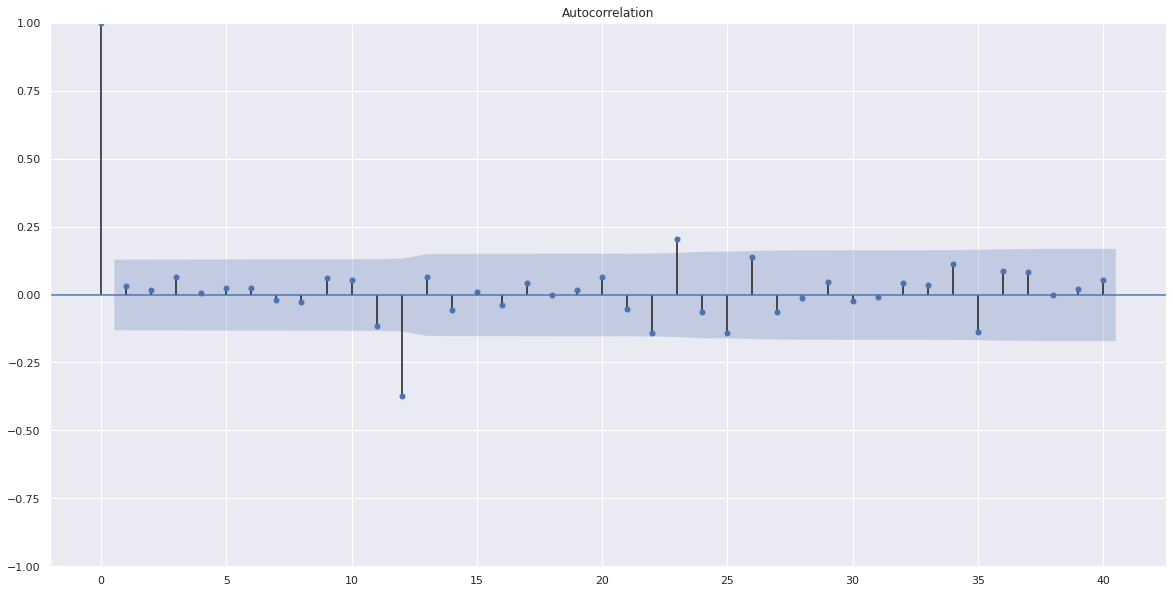

In [206]:
sm.graphics.tsa.plot_acf(residuo_lasso,lags=40)
plt.show()

###Random forest

In [154]:
##Pegando os melhores paramentros
for j in result_random.columns:
  if j == 'criterion':
    criterion = result_random.loc[result_random.index[0],j]
  if j == 'max_features':
    max_features = result_random.loc[result_random.index[0],j]
  if j == 'n_estimators':
    n_estimators	 = result_random.loc[result_random.index[0],j]
  if j == 'max_depth':
    max_depth = result_random.loc[result_random.index[0],j]
  if j == 'min_samples_leaf':
    min_samples_leaf = result_random.loc[result_random.index[0],j]
  else:
    None
print(f'criterion:{criterion}')
print(f'max_features:{max_features}')
print(f'n_estimators:{n_estimators}')
print(f'max_depth:{max_depth}')
print(f'min_samples_leaf:{min_samples_leaf}')

criterion:absolute_error
max_features:45
n_estimators:44
max_depth:30
min_samples_leaf:5


In [155]:
result_random.head()

criterion  max_features  n_estimators  max_depth  min_samples_leaf  \
13   absolute_error            45            44         30                 5   
804  absolute_error            61            77         24                 7   
514  absolute_error            59            16         27                 8   
102  absolute_error            42            54         26                 6   
59     friedman_mse            40            97         34                 7   

     mean_square_error  
13            5.044694  
804           5.050803  
514           5.059931  
102           5.061134  
59            5.079560

In [156]:
rfr = RandomForestRegressor(random_state=0,
              criterion = criterion,
              max_features=max_features,
              n_estimators=n_estimators,
              max_depth=max_depth,
              min_samples_leaf=min_samples_leaf)

In [157]:
rfr.fit(X, y)

RandomForestRegressor(criterion='absolute_error', max_depth=30, max_features=45,
                      min_samples_leaf=5, n_estimators=44, random_state=0)

In [158]:
predic_rando_treino = rfr.predict(X)

In [159]:
residuo_random = y-predic_rando_treino

In [160]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_random,name='Residuos Random', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

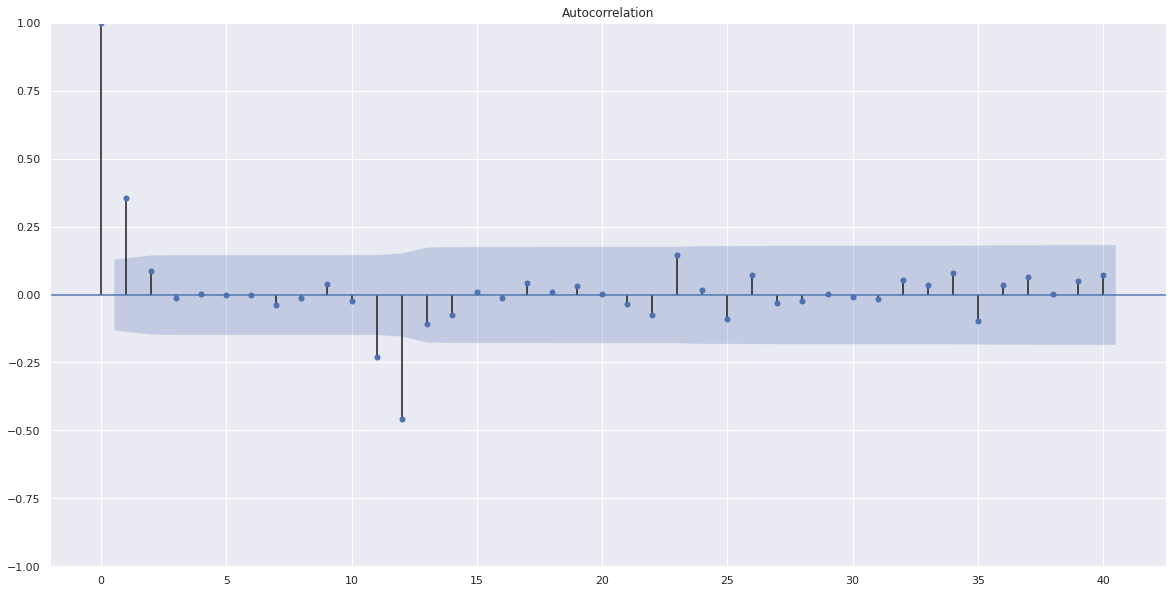

In [161]:
sm.graphics.tsa.plot_acf(residuo_random,lags=40)
plt.show()

###Gradiente Boosting

In [162]:
result_gradi_bostin.head()

loss  learning_rate  max_features  n_estimators  max_depth  \
825  absolute_error       0.108204            29           219          6   
445           huber       0.126129            29            45         20   
161           huber       0.046858            29           168         13   
333  absolute_error       0.163143            29           305         20   
243  absolute_error       0.176011            29           238          7   

     min_samples_leaf       criterio  mean_square_error  
825                 4  squared_error           5.328729  
445                 7  squared_error           5.342622  
161                11  squared_error           5.385862  
333                22   friedman_mse           5.389670  
243                19  squared_error           5.389821

In [163]:
##Pegando os melhores paramentros
for j in result_gradi_bostin.columns:
  if j == 'loss':
    loss = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'max_features':
    max_features = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'n_estimators':
    n_estimators	 = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'max_depth':
    max_depth = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'min_samples_leaf':
    min_samples_leaf = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'learning_rate':
    learning_rate = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  if j == 'criterio':
    criterio = result_gradi_bostin.loc[result_gradi_bostin.index[0],j]
  else:
    None
print(f'criterion:{criterion}')
print(f'max_features:{max_features}')
print(f'n_estimators:{n_estimators}')
print(f'max_depth:{max_depth}')
print(f'min_samples_leaf:{min_samples_leaf}')
print(f'learning_rate:{learning_rate}')
print(f'loss:{loss}')

criterion:absolute_error
max_features:29
n_estimators:219
max_depth:6
min_samples_leaf:4
learning_rate:0.10820440410899501
loss:absolute_error


In [164]:
grad_bost = GradientBoostingRegressor(random_state=0,
                loss = loss,
                learning_rate = learning_rate,
                criterion=criterion,
                max_features=max_features,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf)
grad_bost.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:1854: FutureWarning:

criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.



GradientBoostingRegressor(criterion='absolute_error',
                          learning_rate=0.10820440410899501,
                          loss='absolute_error', max_depth=6, max_features=29,
                          min_samples_leaf=4, n_estimators=219, random_state=0)

In [165]:
predict_grad_treino = grad_bost.predict(X)

In [166]:
residuo_grad = y - predict_grad_treino

In [167]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuo_grad,name='Residuos Gradiente', texttemplate = "%{y}",textfont_size=20))
fig.update_traces(opacity=0.55)
fig.update_layout(autosize=False, width=2000, height=1000,title_text=i)
fig.show()

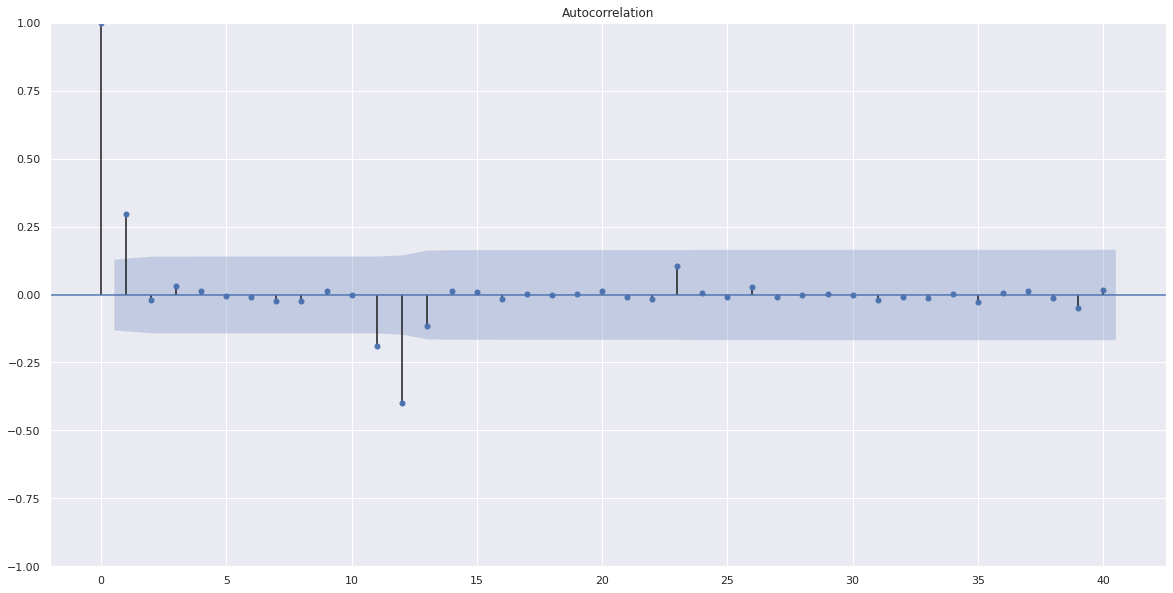

In [168]:
sm.graphics.tsa.plot_acf(residuo_grad,lags=40)
plt.show()

##Previsao com dados de validacao

In [207]:
def plotando_intervalo(predict_val,index,dados_validacao,residuos,nomes):
  pre_int = pd.DataFrame(predict_val,index=index,columns=[str(nomes)])
  residuos= abs(np.mean(residuos))
  pre_int[str(nomes) +'_0,90_cima'] = pre_int[str(nomes)].apply(lambda x : x + (1.96*(abs(np.mean(residuos)))))
  pre_int[str(nomes) +'_0,90_baixo'] = pre_int[str(nomes)].apply(lambda x : x - (1.96*(abs(np.mean(residuos)))))
  plt.plot(pre_int.index,pre_int[str(nomes)], label='Predição_'+str(nomes),linewidth=3)
  plt.fill_between(pre_int.index, pre_int[str(nomes)+'_0,90_cima'], pre_int[str(nomes) +'_0,90_baixo'], color='gray', alpha=0.2)
  plt.plot(pre_int.index,dados_validacao,label='Validação')
  plt.legend()
  return pre_int

In [208]:
y_val= dados_fin_val['producao_ind'].values
X_val=dados_fin_val.loc[:,dados_fin.columns != 'producao_ind'].values

In [209]:
predict_lasso_vali = lasso.predict(X_val)
predict_random_vali = rfr.predict(X_val)
predict_gradiente_vali = grad_bost.predict(X_val)

In [210]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=y_val, name='PRODUÇÃO INDUSTRIAL',marker=dict(color='red')))
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=predict_lasso_vali, name='LASSO',marker=dict(color='green')))
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=predict_random_vali, name='RANDOM FOREST',marker=dict(color='black')))
fig.add_trace(go.Scatter(x=dados_fin_val.index, y=predict_gradiente_vali, name='LASSO',marker=dict(color='yellow')))
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

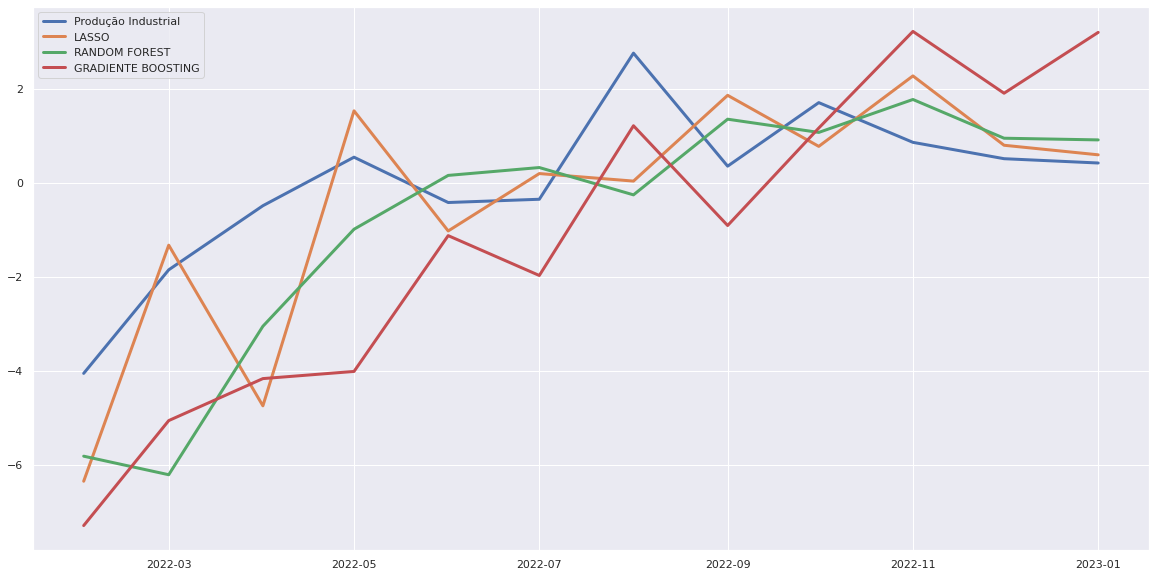

In [211]:
plt.plot(dados_fin_val.index,y_val, label='Produção Industrial',linewidth=3)
plt.plot(dados_fin_val.index,predict_lasso_vali, label='LASSO',linewidth=3)
plt.plot(dados_fin_val.index,predict_random_vali, label='RANDOM FOREST',linewidth=3)
plt.plot(dados_fin_val.index,predict_gradiente_vali, label='GRADIENTE BOOSTING',linewidth=3)
plt.legend();

###Intervalos de previsao

In [212]:
def plotando_intervalo(predict_val,index,dados_validacao,residuos,nomes):
  pre_int = pd.DataFrame(predict_val,index=index,columns=[nomes])
  residuos= abs(np.mean(residuos))
  pre_int[nomes+'_0,95_acima'] = pre_int.iloc[:,0].apply(lambda x : x + (1.96*residuos))
  pre_int[nomes+'_0,95_abaixo'] = pre_int.iloc[:,0].apply(lambda x : x - (1.96*residuos))
  plt.plot(pre_int.index,pre_int[nomes], label='Predição_'+nomes,linewidth=3)
  plt.fill_between(pre_int.index, pre_int[nomes+'_0,95_abaixo'], pre_int[nomes+'_0,95_acima'], color='gray', alpha=0.2)
  plt.plot(pre_int.index,dados_validacao,label='Validão')
  plt.legend()
  return pre_int

In [216]:
np.mean(residuo_las)

-0.6549488240676892

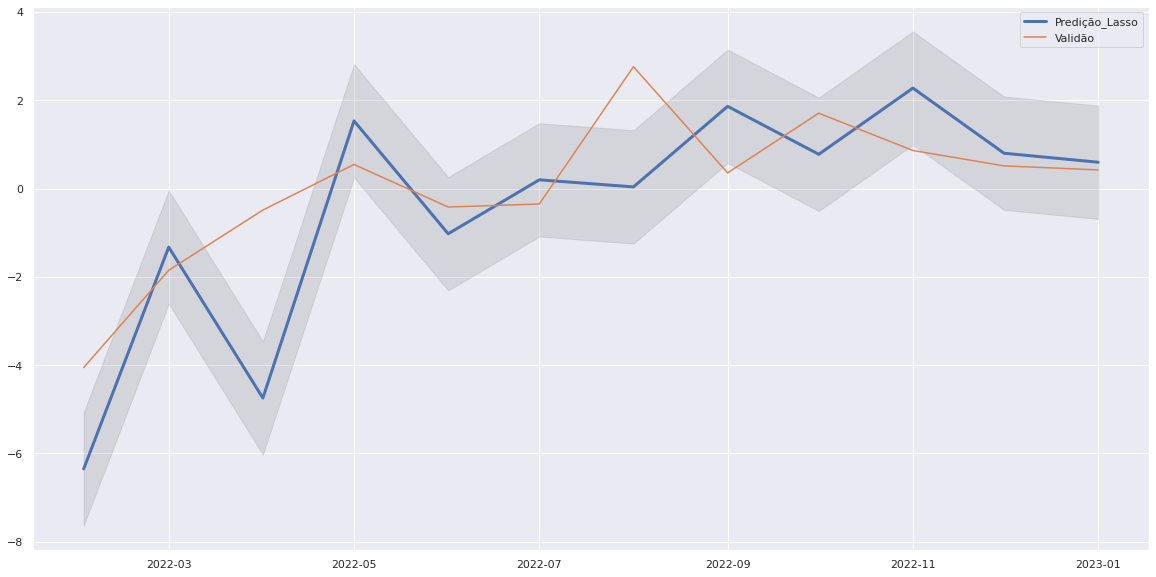

In [213]:
intervalo_lasso = plotando_intervalo(predict_lasso_vali, dados_fin_val.index, y_val, residuo_las, 'Lasso')


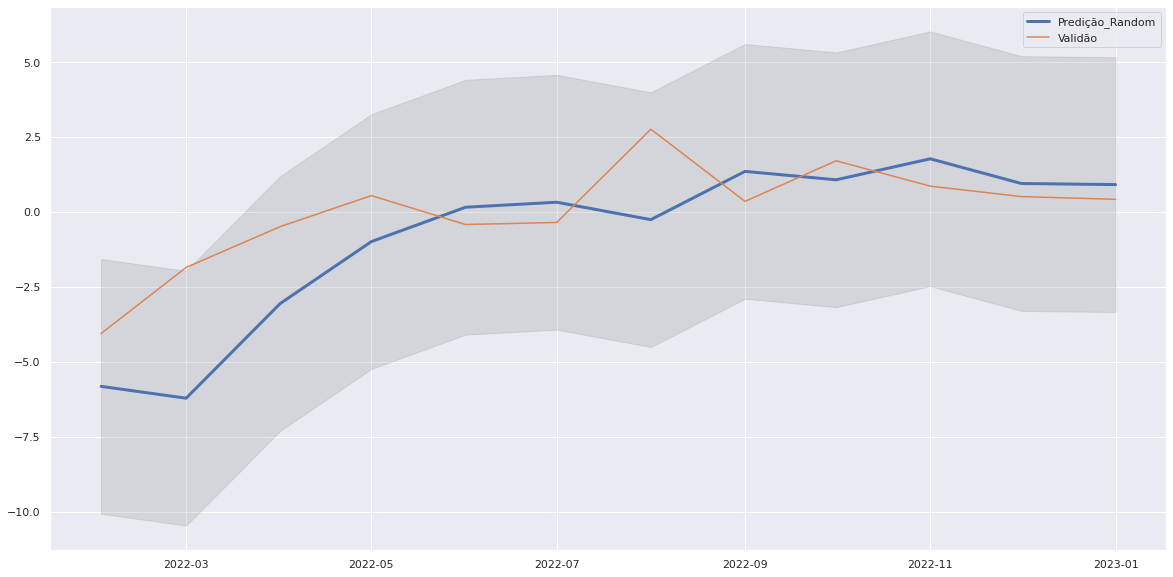

In [176]:
intrevalo_random = plotando_intervalo(predict_random_vali, dados_fin_val.index, y_val, residuo_ran, 'Random')

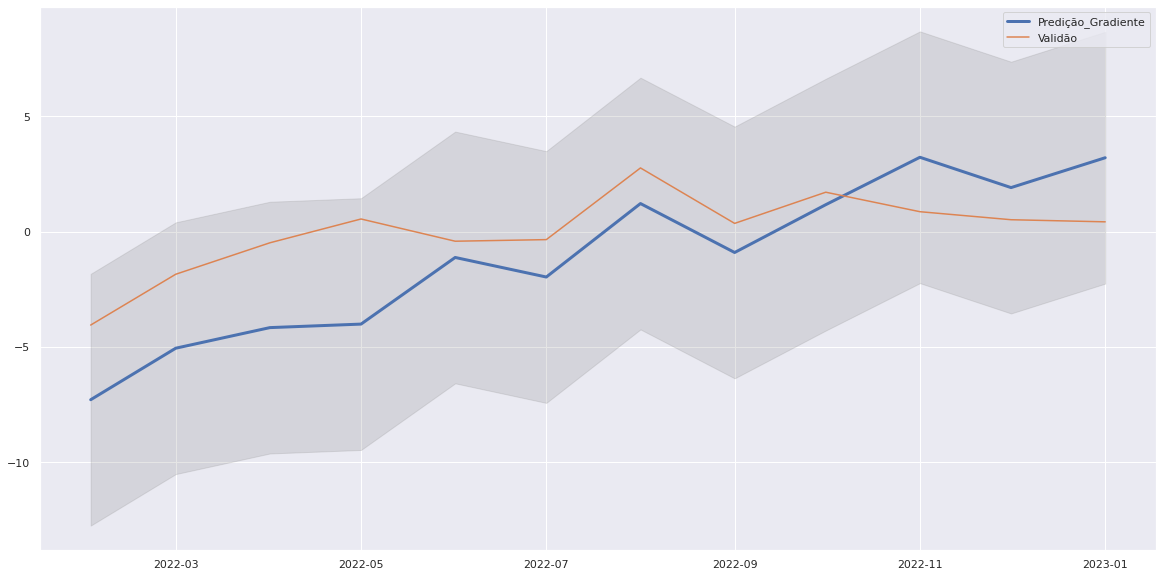

In [177]:
intervalo_gradiente = plotando_intervalo(predict_gradiente_vali, dados_fin_val.index, y_val, residuo_gradiente, 'Gradiente')

In [178]:
"""intervalo_lasso = pd.DataFrame(predict_random_vali,index=dados_fin_val.index,columns=['Lasso'])
intervalo_lasso['Lasso_0,90_cima'] = intervalo_lasso['Lasso'].apply(lambda x : x + (1.96*(abs(np.mean(residuo_lasso)))))
intervalo_lasso['Lasso_0,90_abaixo'] = intervalo_lasso['Lasso'].apply(lambda x : x - (1.96*(abs(np.mean(residuo_lasso)))))
plt.plot(intervalo_lasso.index,intervalo_lasso['Lasso'], label='Predição Random',linewidth=3)
plt.fill_between(intervalo_lasso.index, intervalo_lasso['Lasso_0,90_abaixo'], intervalo_lasso['Lasso_0,90_cima'], color='gray', alpha=0.2)
plt.plot(intervalo_lasso.index,y_val)"""

"intervalo_lasso = pd.DataFrame(predict_random_vali,index=dados_fin_val.index,columns=['Lasso'])\nintervalo_lasso['Lasso_0,90_cima'] = intervalo_lasso['Lasso'].apply(lambda x : x + (1.96*(abs(np.mean(residuo_lasso)))))\nintervalo_lasso['Lasso_0,90_abaixo'] = intervalo_lasso['Lasso'].apply(lambda x : x - (1.96*(abs(np.mean(residuo_lasso)))))\nplt.plot(intervalo_lasso.index,intervalo_lasso['Lasso'], label='Predição Random',linewidth=3)\nplt.fill_between(intervalo_lasso.index, intervalo_lasso['Lasso_0,90_abaixo'], intervalo_lasso['Lasso_0,90_cima'], color='gray', alpha=0.2)\nplt.plot(intervalo_lasso.index,y_val)"


##Cenarios com dados fora da amostra

In [217]:
dados_defasados.head()

trafego_pesado  producao_ind  producao_ind_int  \
2003-06-01       -5.994100     -1.553636          84.48595   
2003-07-01        8.494886     -2.305300          89.22375   
2003-08-01       -1.657895     -2.335371          88.87035   
2003-09-01        0.789117      4.313285          91.36703   
2003-10-01        6.661507      0.914177          93.95489   

            capacidade_instalada    caixas  faturamento  importacoes  \
2003-06-01                  79.6 -11817.34         -4.0        -3.30   
2003-07-01                  79.2   7340.55          5.0         5.17   
2003-08-01                  79.9   6217.28          3.0        -3.62   
2003-09-01                  80.6  12671.97          4.0         9.08   
2003-10-01                  80.7  15059.68          4.0         4.84   

            importacoes_int  confianca_consumidor  producao_de_veiculos  ...  \
2003-06-01            -5.60                  4.77              -17346.0  ...   
2003-07-01             7.82                 -5.34                6419.0  ...   
2003-08-01            -5.96                 -2.10                -577.0  ...   
2003-09-01             7.51                 -2.96               25548.0  ...   
2003-10-01             2.67                 -1.69                5322.0  ...   

            capacidade_instalada_lags_4  caixas_lags_4  faturamento_lags_4  \
2003-06-01                         79.2       -3869.56                 2.0   
2003-07-01                         79.8        9969.40                 2.0   
2003-08-01                         79.3       -1083.28                -3.0   
2003-09-01                         80.2       -5806.22                 4.0   
2003-10-01                         79.6      -11817.34                -4.0   

            importacoes_lags_4  importacoes_int_lags_4  \
2003-06-01                1.04                    1.18   
2003-07-01               -1.68                   -0.91   
2003-08-01                3.72                    2.19   
2003-09-01               -1.07                    2.28   
2003-10-01               -3.30                   -5.60   

            confianca_consumidor_lags_4  producao_de_veiculos_lags_4  \
2003-06-01                         0.56                       8921.0   
2003-07-01                        -1.64                     -13643.0   
2003-08-01                         5.77                       3297.0   
2003-09-01                         4.38                      11074.0   
2003-10-01                         4.77                     -17346.0   

            producao_aco_lags_4  selic_lags_4  ettj_26_lags_4  
2003-06-01               118.47      0.676267             0.0  
2003-07-01               133.11      0.678571             0.0  
2003-08-01               126.92      0.000000             0.0  
2003-09-01               134.47      0.000000             0.0  
2003-10-01               130.39     -0.183333             0.0  

[5 rows x 66 columns]

In [218]:
dados_defasados.drop(drop,axis=1,inplace=True)

In [219]:
y_fora= dados_defasados['producao_ind']
X_fora=dados_defasados.loc[:,dados_defasados.columns != 'producao_ind']

In [220]:
X_fora

selic   ettj_26  ettj_26_dummy  trafego_pesado_lags_1  \
2003-06-01 -0.183333  0.000000              0               5.066021   
2003-07-01 -0.703763  0.000000              0              -5.994100   
2003-08-01 -2.000000  0.000000              0               8.494886   
2003-09-01 -2.479570  0.000000              0              -1.657895   
2003-10-01 -1.423656  0.000000              0               0.789117   
...              ...       ...            ...                    ...   
2022-09-01  0.048387 -0.006787              1               4.139583   
2022-10-01  0.000000 -0.112663              1              -7.028647   
2022-11-01  0.000000  0.252505              1              -1.601791   
2022-12-01  0.000000 -0.157740              1              -4.400137   
2023-01-01  0.000000 -0.074325              1              -4.733451   

            producao_ind_lags_1  producao_ind_int_lags_1  \
2003-06-01            -0.952090                87.891210   
2003-07-01            -1.553636                84.485950   
2003-08-01            -2.305300                89.223750   
2003-09-01            -2.335371                88.870350   
2003-10-01             4.313285                91.367030   
...                         ...                      ...   
2022-09-01             2.758782                98.343620   
2022-10-01             0.354030                93.141520   
2022-11-01             1.706088                92.529960   
2022-12-01             0.860787                87.327520   
2023-01-01             0.512951                89.819179   

            capacidade_instalada_lags_1  caixas_lags_1  faturamento_lags_1  \
2003-06-01                    80.200000       -5806.22             4.00000   
2003-07-01                    79.600000      -11817.34            -4.00000   
2003-08-01                    79.200000        7340.55             5.00000   
2003-09-01                    79.900000        6217.28             3.00000   
2003-10-01                    80.600000       12671.97             4.00000   
...                                 ...            ...                 ...   
2022-09-01                    81.700000        8584.00            12.00000   
2022-10-01                    81.300000      -14779.00            -6.00000   
2022-11-01                    80.900000       -4745.00             0.00000   
2022-12-01                    80.400000      -15483.00             2.00000   
2023-01-01                    80.517908      -29739.00            -1.02067   

            importacoes_lags_1  ...  capacidade_instalada_lags_4  \
2003-06-01           -1.070000  ...                         79.2   
2003-07-01           -3.300000  ...                         79.8   
2003-08-01            5.170000  ...                         79.3   
2003-09-01           -3.620000  ...                         80.2   
2003-10-01            9.080000  ...                         79.6   
...                        ...  ...                          ...   
2022-09-01           13.400000  ...                         80.9   
2022-10-01           -3.390000  ...                         80.8   
2022-11-01           -6.400000  ...                         81.3   
2022-12-01          -12.790000  ...                         81.7   
2023-01-01            1.699619  ...                         81.3   

            caixas_lags_4  faturamento_lags_4  importacoes_lags_4  \
2003-06-01       -3869.56                 2.0                1.04   
2003-07-01        9969.40                 2.0               -1.68   
2003-08-01       -1083.28                -3.0                3.72   
2003-09-01       -5806.22                 4.0               -1.07   
2003-10-01      -11817.34                -4.0               -3.30   
...                   ...                 ...                 ...   
2022-09-01       25299.00                10.0               15.56   
2022-10-01        3195.00                 2.0               -4.46   
2022-11-01       14644.00                -1.0         

In [221]:
dates = pd.date_range(start=datetime.now() + timedelta(days=30), periods=12, freq='M').strftime("%Y-%m-%d")
arima_predict = pd.DataFrame(index=dates)
for j,k in enumerate(X_fora.columns):
  if X_fora.columns.str.contains("dummy")[j] != True:
    model_arima = arima.auto_arima(X_fora[k].values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    model_arima.fit(X_fora[k].values)
    arima_predict[k] = model_arima.predict(n_periods=12)
  else:
    arima_predict[k] = [1]*12

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21.112, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=297.765, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=23.804, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=143.555, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=23.056, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=22.610, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=108.293, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=21.385, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=13.035, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=12.996, Time=0.81 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=18.182, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-5.503, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-5.656, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-7.291, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=51.226, Time=0.1

In [222]:
arima_predict

selic   ettj_26  ettj_26_dummy  trafego_pesado_lags_1  \
2023-03-31 -0.019885  0.048537              1               4.461432   
2023-04-30  0.026311 -0.062775              1               0.640150   
2023-05-31  0.034033 -0.019434              1               1.098615   
2023-06-30  0.023685 -0.003733              1               0.557693   
2023-07-31  0.016483 -0.025484              1               0.471866   
2023-08-31  0.011471 -0.010627              1               0.348544   
2023-09-30  0.007983 -0.009314              1               0.294948   
2023-10-31  0.005556 -0.012132              1               0.256276   
2023-11-30  0.003866 -0.007468              1               0.234700   
2023-12-31  0.002691 -0.007151              1               0.221094   
2024-01-31  0.001873 -0.006779              1               0.213016   
2024-02-29  0.001303 -0.005168              1               0.208078   

            producao_ind_lags_1  producao_ind_int_lags_1  \
2023-03-31             0.457932                89.819665   
2023-04-30             0.376505                88.254653   
2023-05-31             0.309556                91.077444   
2023-06-30             0.254512                87.762816   
2023-07-31             0.209256                90.666676   
2023-08-31             0.172047                88.931430   
2023-09-30             0.141454                89.046397   
2023-10-31             0.116302                90.543969   
2023-11-30             0.095621                87.852571   
2023-12-31             0.078618                90.988954   
2024-01-31             0.064639                88.242713   
2024-02-29             0.053145                89.863560   

            capacidade_instalada_lags_1  caixas_lags_1  faturamento_lags_1  \
2023-03-31                    80.545179   16129.091826           -2.366286   
2023-04-30                    80.619707    1943.915344           -1.388042   
2023-05-31                    80.661635    7537.272068           -0.814213   
2023-06-30                    80.686883     893.291445           -0.477610   
2023-07-31                    80.695320    1480.329610           -0.280162   
2023-08-31                    80.695545    -289.831274           -0.164340   
2023-09-30                    80.692288      64.463273           -0.096401   
2023-10-31                    80.688767    -222.769505           -0.056548   
2023-11-30                    80.686195     -27.425719           -0.033170   
2023-12-31                    80.684782     -59.780184           -0.019457   
2024-01-31                    80.684244       2.843626           -0.011414   
2024-02-29                    80.684208      -6.771864           -0.006695   

            importacoes_lags_1  ...  capacidade_instalada_lags_4  \
2023-03-31           -1.024872  ...                    81.084935   
2023-04-30            1.334140  ...                    80.891696   
2023-05-31            2.455695  ...                    80.802702   
2023-06-30           -0.435366  ...                    80.769881   
2023-07-31            0.607667  ...                    80.772333   
2023-08-31            1.419334  ...                    80.786469   
2023-09-30           -0.073957  ...                    80.801083   
2023-10-31            0.358038  ...                    80.811262   
2023-11-30            0.889432  ...                    80.816629   
2023-12-31            0.127677  ...                    80.818481   
2024-01-31            0.288636  ...                    80.818413   
2024-02-29            0.616392  ...                    80.817627   

            caixas_lags_4  faturamento_lags_4  importacoes_lags_4  \
2023-03-31   -2387.776356           -2.927963            1.643415   
2023-04-30   -4584.570270           -1.710764            1.598788   
2023-05-31    -179.718735           -0.999573           -1.555895   
2023-06-30    -630.449193           -0.584035            0.889956   
2023-07-31     309.881959           -0.341243       

In [223]:
dum_arima = pd.get_dummies(pd.to_datetime(arima_predict.index).month)
##Apagando a ultima coluna que todas os numeros zeros irao responder pr ela
dum_arima.drop(12,axis=1,inplace=True)

In [224]:
dum_arima.columns = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov']
dum_arima.index = arima_predict.index

In [225]:
dum_arima

jan  fev  mar  abr  mai  jun  jul  ago  set  out  nov
2023-03-31    0    0    1    0    0    0    0    0    0    0    0
2023-04-30    0    0    0    1    0    0    0    0    0    0    0
2023-05-31    0    0    0    0    1    0    0    0    0    0    0
2023-06-30    0    0    0    0    0    1    0    0    0    0    0
2023-07-31    0    0    0    0    0    0    1    0    0    0    0
2023-08-31    0    0    0    0    0    0    0    1    0    0    0
2023-09-30    0    0    0    0    0    0    0    0    1    0    0
2023-10-31    0    0    0    0    0    0    0    0    0    1    0
2023-11-30    0    0    0    0    0    0    0    0    0    0    1
2023-12-31    0    0    0    0    0    0    0    0    0    0    0
2024-01-31    1    0    0    0    0    0    0    0    0    0    0
2024-02-29    0    1    0    0    0    0    0    0    0    0    0

In [226]:
arima_dum_predict = arima_predict.join(dum_arima)
arima_dum_predict.head()

selic   ettj_26  ettj_26_dummy  trafego_pesado_lags_1  \
2023-03-31 -0.019885  0.048537              1               4.461432   
2023-04-30  0.026311 -0.062775              1               0.640150   
2023-05-31  0.034033 -0.019434              1               1.098615   
2023-06-30  0.023685 -0.003733              1               0.557693   
2023-07-31  0.016483 -0.025484              1               0.471866   

            producao_ind_lags_1  producao_ind_int_lags_1  \
2023-03-31             0.457932                89.819665   
2023-04-30             0.376505                88.254653   
2023-05-31             0.309556                91.077444   
2023-06-30             0.254512                87.762816   
2023-07-31             0.209256                90.666676   

            capacidade_instalada_lags_1  caixas_lags_1  faturamento_lags_1  \
2023-03-31                    80.545179   16129.091826           -2.366286   
2023-04-30                    80.619707    1943.915344           -1.388042   
2023-05-31                    80.661635    7537.272068           -0.814213   
2023-06-30                    80.686883     893.291445           -0.477610   
2023-07-31                    80.695320    1480.329610           -0.280162   

            importacoes_lags_1  ...  fev  mar  abr  mai  jun  jul  ago  set  \
2023-03-31           -1.024872  ...    0    1    0    0    0    0    0    0   
2023-04-30            1.334140  ...    0    0    1    0    0    0    0    0   
2023-05-31            2.455695  ...    0    0    0    1    0    0    0    0   
2023-06-30           -0.435366  ...    0    0    0    0    1    0    0    0   
2023-07-31            0.607667  ...    0    0    0    0    0    1    0    0   

            out  nov  
2023-03-31    0    0  
2023-04-30    0    0  
2023-05-31    0    0  
2023-06-30    0    0  
2023-07-31    0    0  

[5 rows x 66 columns]

In [227]:
arima_dum_predict.to_csv('arima_dum_predict.csv')

In [228]:
arima_lasso = lasso.predict(arima_dum_predict.values)
arima_random = rfr.predict(arima_dum_predict.values)
arima_gradien = grad_bost.predict(arima_dum_predict.values)

In [229]:
predicao = pd.DataFrame({'lassso':arima_lasso,
                         'Random Forest':arima_random,
                         'Gradiente Bosting':arima_gradien},
                        index=pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"))

In [230]:
predicao

lassso  Random Forest  Gradiente Bosting
2023-03  0.235766       1.505914           3.488351
2023-04  0.334140       1.695340           2.694101
2023-05  0.208804       1.532296           3.162267
2023-06  0.301243       1.370618           3.080258
2023-07  0.276148       1.155021           3.093242
2023-08  0.288883       1.148978           3.082111
2023-09  0.253725       1.091890           3.074418
2023-10  0.239415       1.028894           3.041432
2023-11  0.219205       0.604429           2.263054
2023-12  0.202901       0.318316           2.191180
2024-01  0.190418       0.241242           2.361361
2024-02  0.182296       0.286539           2.394294

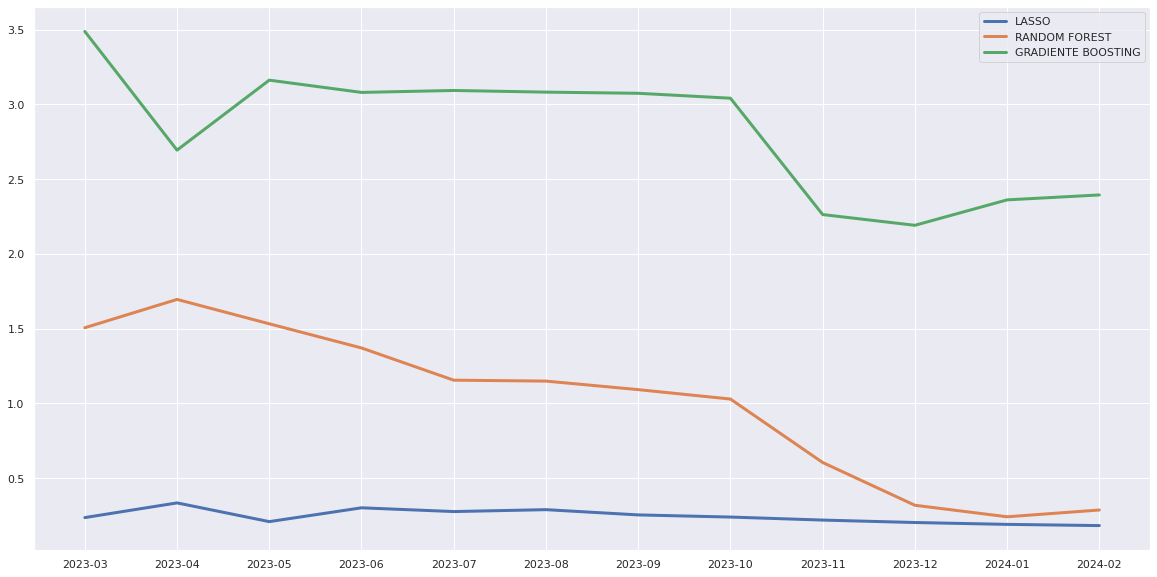

In [231]:
plt.plot(pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"),arima_lasso, label='LASSO',linewidth=3)
plt.plot(pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"),arima_random, label='RANDOM FOREST',linewidth=3)
plt.plot(pd.to_datetime(arima_dum_predict.index).strftime("%Y-%m"),arima_gradien, label='GRADIENTE BOOSTING',linewidth=3)
plt.legend();

In [232]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=arima_dum_predict.index, y=arima_lasso, name='LASSO',marker=dict(color='red')))
fig.add_trace(go.Scatter(x=arima_dum_predict.index, y=arima_random, name='RANDOM FOREST',marker=dict(color='green')))
fig.add_trace(go.Scatter(x=arima_dum_predict.index, y=arima_gradien, name='GRADIENTE BOSTING',marker=dict(color='black')))
fig.update_layout(autosize=False, width=2000, height=1000)
fig.show()

##Intervalo de previsao

In [237]:
def plotando_intervalo_cenario(predict_val,index,residuos,nomes):
  pre_int = pd.DataFrame(predict_val,index=index,columns=[str(nomes)])
  residuos= abs(np.mean(residuos))
  pre_int[str(nomes) +'_0,95_cima'] = pre_int[str(nomes)].apply(lambda x : x + (1.96*(abs(np.mean(residuos)))))
  pre_int[str(nomes) +'_0,95_abaixo'] = pre_int[str(nomes)].apply(lambda x : x - (1.96*(abs(np.mean(residuos)))))
  plt.plot(pre_int.index,pre_int[str(nomes)], label='Predição_'+str(nomes),linewidth=3)
  plt.fill_between(pre_int.index, pre_int[str(nomes)+'_0,95_cima'], pre_int[str(nomes) +'_0,95_abaixo'], color='gray', alpha=0.2)
  plt.legend()
  return pre_int

Lasso  Lasso_0,95_cima  Lasso_0,95_abaixo
2023-03  0.235766         1.519465          -1.047934
2023-04  0.334140         1.617840          -0.949559
2023-05  0.208804         1.492504          -1.074896
2023-06  0.301243         1.584942          -0.982457
2023-07  0.276148         1.559847          -1.007552
2023-08  0.288883         1.572583          -0.994816
2023-09  0.253725         1.537424          -1.029975
2023-10  0.239415         1.523115          -1.044285
2023-11  0.219205         1.502905          -1.064495
2023-12  0.202901         1.486601          -1.080799
2024-01  0.190418         1.474118          -1.093282
2024-02  0.182296         1.465996          -1.101403

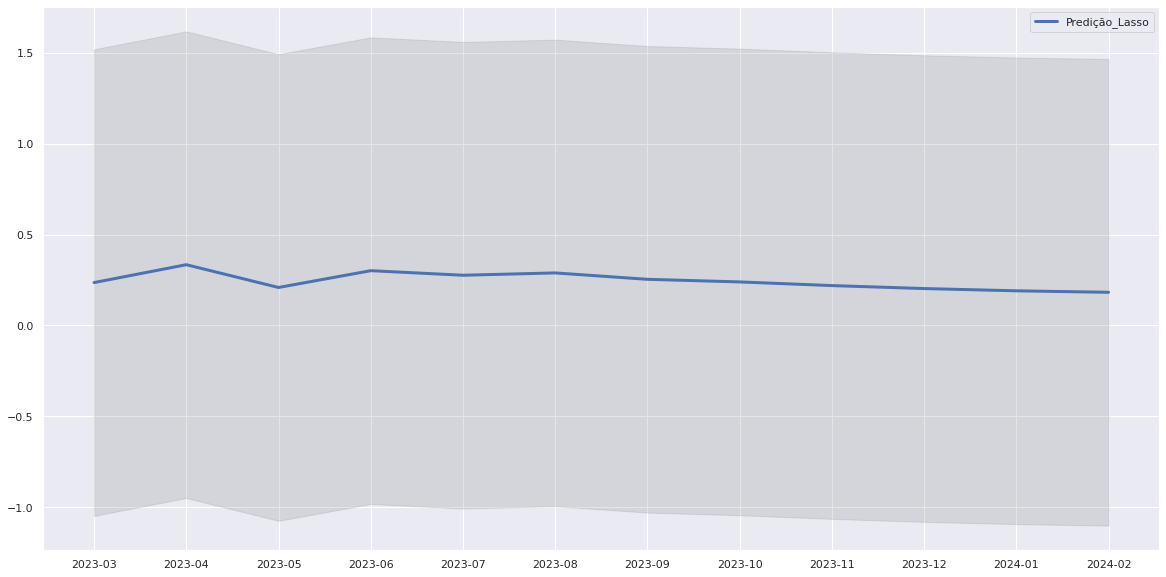

In [238]:
plotando_intervalo_cenario(arima_lasso,predicao.index,residuo_las,'Lasso')

random  random_0,95_cima  random_0,95_abaixo
2023-03  1.505914          5.754341           -2.742513
2023-04  1.695340          5.943767           -2.553087
2023-05  1.532296          5.780722           -2.716131
2023-06  1.370618          5.619045           -2.877808
2023-07  1.155021          5.403448           -3.093406
2023-08  1.148978          5.397405           -3.099448
2023-09  1.091890          5.340316           -3.156537
2023-10  1.028894          5.277321           -3.219533
2023-11  0.604429          4.852856           -3.643997
2023-12  0.318316          4.566743           -3.930110
2024-01  0.241242          4.489669           -4.007184
2024-02  0.286539          4.534966           -3.961888

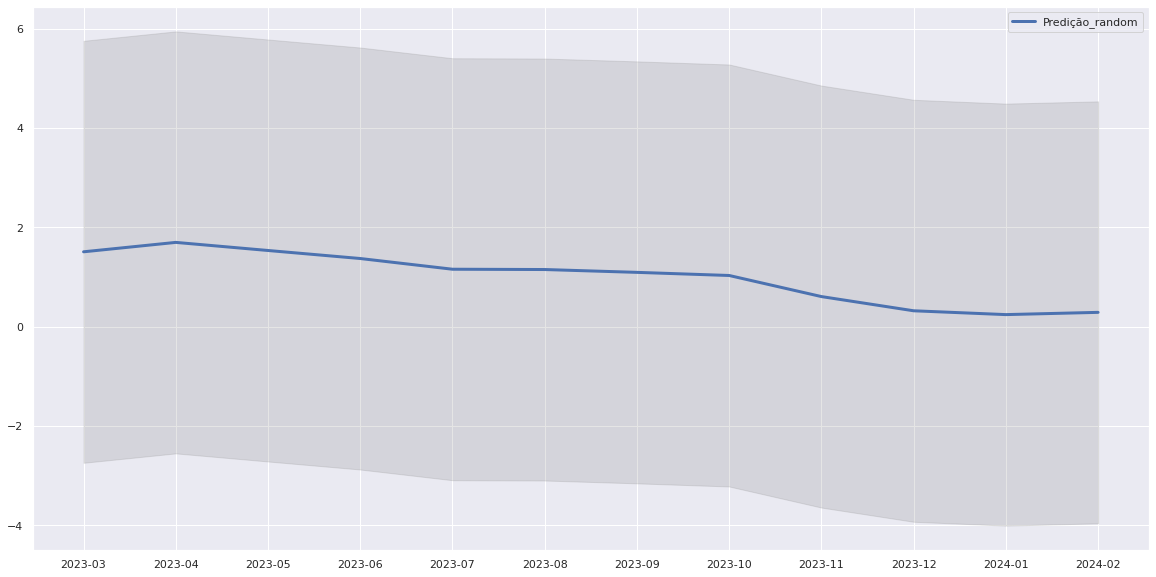

In [239]:
plotando_intervalo_cenario(arima_random,predicao.index,residuo_ran,'random')

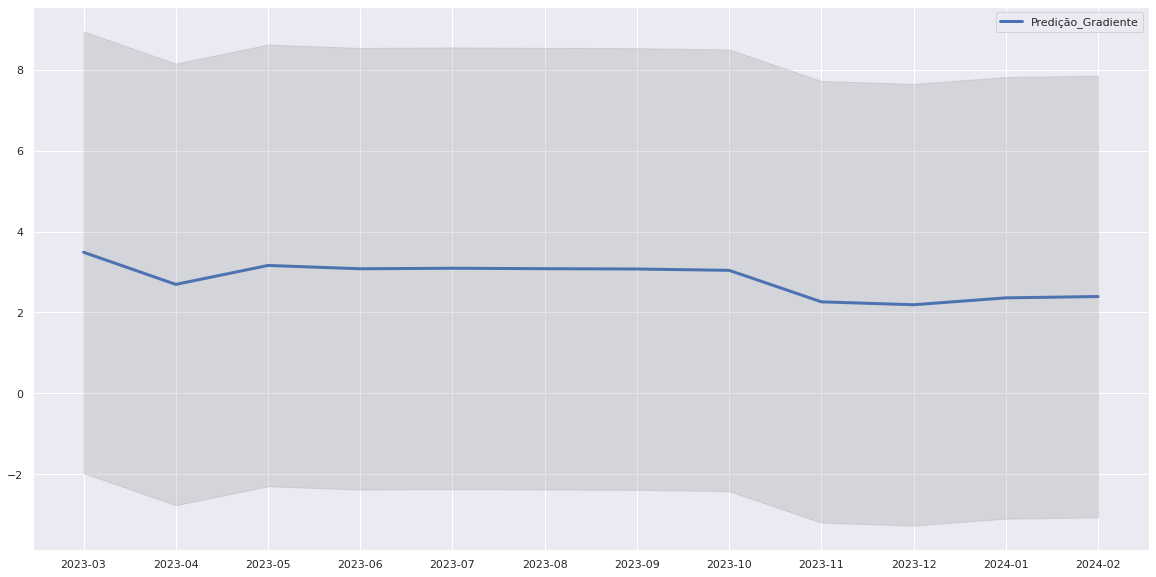

In [240]:
intervalo_gradiente = plotando_intervalo_cenario(arima_gradien,predicao.index,residuo_gradiente,'Gradiente')